In [1]:
import dask
dask.config.set({"dataframe.query-planning": False})

import numpy as np
import pandas as pd
import sys
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


sys.path.append("../../../workflow/scripts/")
import _utils
import readwrite
cfg = readwrite.config()
sns.set_style('ticks')

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/importlib/__init__.py:126: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error a

# Params

In [2]:
# cfg paths
xenium_dir = Path(cfg['xenium_processed_data_dir'])
xenium_count_correction_dir = Path(cfg['xenium_count_correction_dir'])
xenium_std_seurat_analysis_dir = Path(cfg['xenium_std_seurat_analysis_dir'])
xenium_cell_type_annotation_dir = Path(cfg['xenium_cell_type_annotation_dir'])
results_dir = Path(cfg['results_dir'])
palette_dir = Path(cfg['xenium_metadata_dir'])
std_seurat_analysis_dir = Path(cfg['xenium_std_seurat_analysis_dir'])
scrnaseq_processed_data_dir = Path(cfg['scrnaseq_processed_data_dir'])
seurat_to_h5_dir = results_dir / 'seurat_to_h5'

# Params
signal_integrity_thresholds = [0.5, 0.7]
correction_methods = ['raw', 'split_fully_purified', 'resolvi', 'resolvi_supervised']
correction_methods += [f'ovrlpy_correction_{signal_integrity_threshold=}' for signal_integrity_threshold in signal_integrity_thresholds]
num_samples = 30
mixture_k = 50
normalisation = 'lognorm'
layer = 'data'
reference = 'matched_reference_combo'
method = 'rctd_class_aware'
level = 'Level2.1'
segmentation_palette = palette_dir / 'col_palette_segmentation.csv'
count_correction_palette = palette_dir / 'col_palette_correction_method.csv'

n_neighbors = 10
n_permutations = 30
n_repeats = 5
top_n = 20
scoring = 'f1'
markers = 'diffexpr'

xenium_levels = ["segmentation", "condition", "panel", "donor", "sample"]
order = ['breast','chuvio','lung','5k']

hue_segmentation = "segmentation"
hue_segmentation_order = [
    "10x_mm_0um",
    "10x_mm_5um",
    "10x_mm_15um",
    "10x_0um",
    "10x_5um",
    "10x_15um",
    "baysor",
    "proseg_expected",
    "proseg_mode",
    "segger",
]

hue_correction = 'correction_method'
hue_correction_order = [
    'raw',
    'ResolVI',
    'ResolVI supervised',
    'ovrlpy 0.5',
    'ovrlpy 0.7',
    'SPLIT',
]

rank_metrics = ["importances"]
plot_metrics = ['hypergeometric_pvalue','NES',f"n_hits_{top_n=}"]
labels_key = level

# Load results logreg

In [3]:
dfs = readwrite.read_contamination_metrics_results(
    results_dir,
    correction_methods,
    xenium_std_seurat_analysis_dir,
    reference,
    method,
    level,
    mixture_k,
    num_samples,
    normalisation,
    layer,
    evaluation='logreg'
)

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/split_fully_purified/proseg_expected/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/proseg_expected/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/proseg_expected/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_bas

Processing futures:  17%|█▋        | 255/1506 [00:00<00:00, 1493.97it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/split_fully_purified/proseg_expected/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/proseg_expected/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/proseg_expected/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_r

Processing futures:  27%|██▋       | 409/1506 [00:13<00:43, 25.17it/s]  

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/split_fully_purified/baysor/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/baysor/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/baysor/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/

Processing futures:  31%|███▏      | 473/1506 [00:19<00:58, 17.67it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/split_fully_purified/10x_0um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_0um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_0um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_clas

Processing futures:  67%|██████▋   | 1011/1506 [01:06<00:23, 20.95it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_pap

Processing futures:  70%|███████   | 1057/1506 [01:09<00:13, 34.33it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_me

Processing futures:  73%|███████▎  | 1100/1506 [01:11<00:12, 33.00it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination

Processing futures:  76%|███████▌  | 1148/1506 [01:14<00:06, 52.22it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contaminat

Processing futures:  79%|███████▊  | 1185/1506 [01:16<00:10, 30.71it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/1GDD/1GDD/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/1GDD/1GDD/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexp

Processing futures:  81%|████████  | 1218/1506 [01:19<00:23, 12.32it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination

Processing futures:  84%|████████▍ | 1268/1506 [01:22<00:12, 19.29it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_pap

Processing futures:  86%|████████▋ | 1300/1506 [01:25<00:23,  8.70it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/1G73/1G73/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexp

Processing futures:  89%|████████▉ | 1342/1506 [01:27<00:09, 17.84it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination

Processing futures:  93%|█████████▎| 1399/1506 [01:29<00:03, 33.84it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contaminat

Processing futures:  95%|█████████▌| 1437/1506 [01:32<00:02, 24.77it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_me

Processing futures:  98%|█████████▊| 1474/1506 [01:34<00:01, 22.84it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_marker_genes.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination

Processing futures: 100%|██████████| 1506/1506 [01:36<00:00, 15.62it/s]


# Plot decontamination results marker ranks

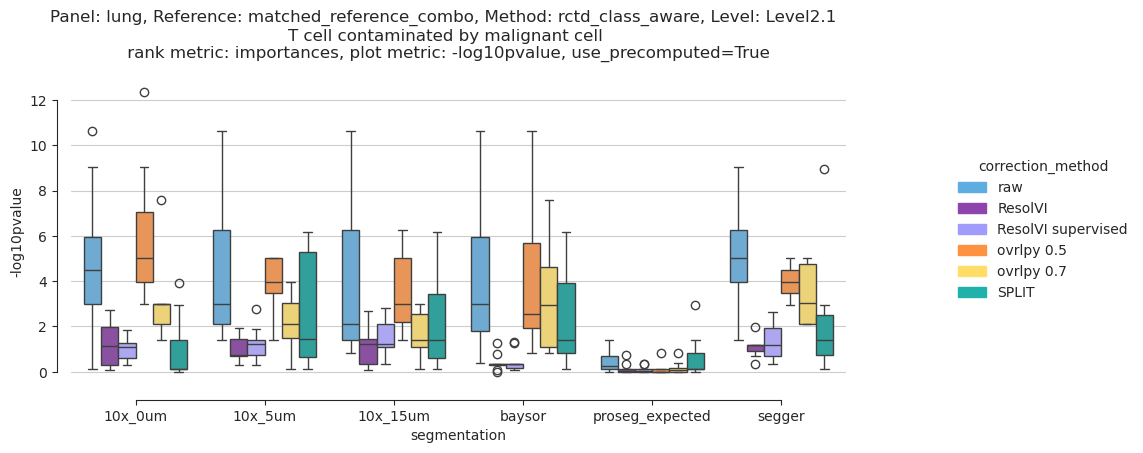

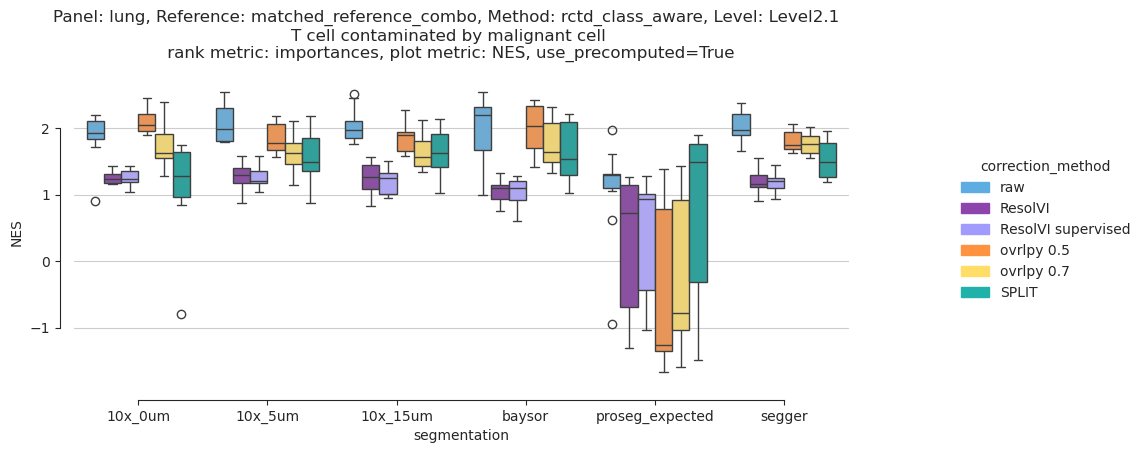

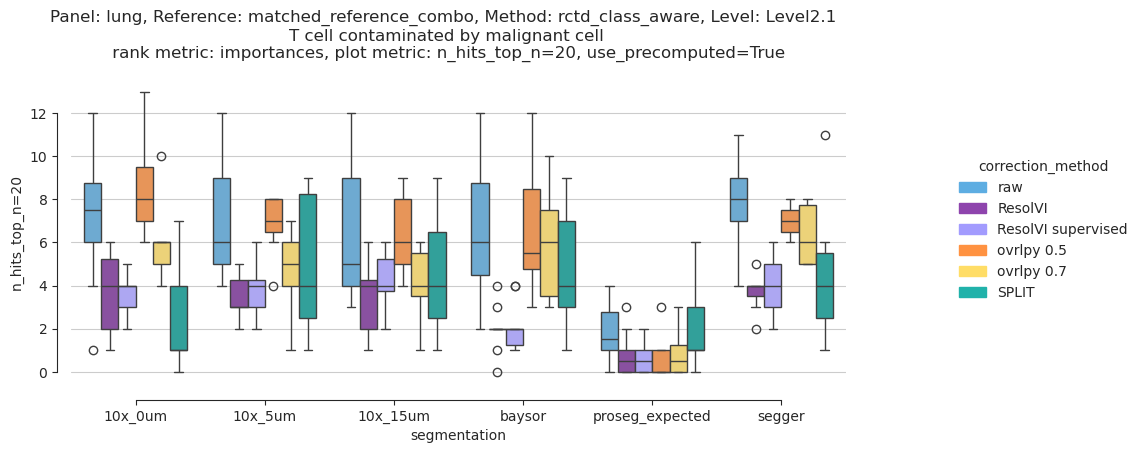

In [13]:
ref_panel = 'lung'
cti = 'T cell'
ctj = 'malignant cell'
use_precomputed = True
palette = pd.read_csv(count_correction_palette, index_col=0).iloc[:, 0]

for rank_metric in rank_metrics:
    plot_metrics_ = plot_metrics[-1:] if rank_metric == 'mean_zscore' else plot_metrics
    for plot_metric in plot_metrics_:
        df = _utils.get_df_marker_rank_significance_plot(dfs['df_markers_rank_significance_logreg'],
                        rank_metric=rank_metric,plot_metric=plot_metric,
                        correction_methods=correction_methods,use_precomputed=use_precomputed)

        df = df.query(f"panel == '{ref_panel}' and cti == @cti and ctj == @ctj")

        if plot_metric in ['hypergeometric_pvalue','mean_zscore_pvalue']:
            df['-log10pvalue'] = -np.log10(df[plot_metric].astype(float))
            plot_metric = '-log10pvalue'

        # plotting params, palette
        title = f"Panel: {ref_panel}, Reference: {reference}, Method: {method}, Level: {level} \n{cti} contaminated by {ctj}\n rank metric: {rank_metric}, plot metric: {plot_metric}, {use_precomputed=}"
        unique_labels = [c for c in hue_correction_order if c in np.unique(df[hue_correction].dropna())]
        unique_labels = unique_labels + [c for c in np.unique(df[hue_correction].dropna()) if c not in unique_labels]
        palette = {u: palette[u] for u in unique_labels}
        legend_handles = [mpatches.Patch(color=color, label=label) for label, color in palette.items()]

        ### hypergeometric pvalue boxplot
        f = plt.figure(figsize=(10, 4))
        ax = plt.subplot()
        g = sns.boxplot(df,x='segmentation',y=plot_metric, 
                        hue=hue_correction, hue_order=unique_labels, 
                        legend=False, palette=palette,ax=ax,
                        order=[s for s in hue_segmentation_order if s in df['segmentation'].unique()]
                        )

        sns.despine(offset=10, trim=True)
        ax.yaxis.grid(True)

        plt.suptitle(title,y=1.05)
        f.legend(
            handles=legend_handles,
            loc="center left",
            bbox_to_anchor=(1, 0.5),
            title=hue_correction,
            frameon=False,
        )
        # plt.tight_layout(rect=[0, 0, 1, 0.95])
        # plt.savefig(out_file, dpi=dpi, bbox_inches="tight")
        plt.show()

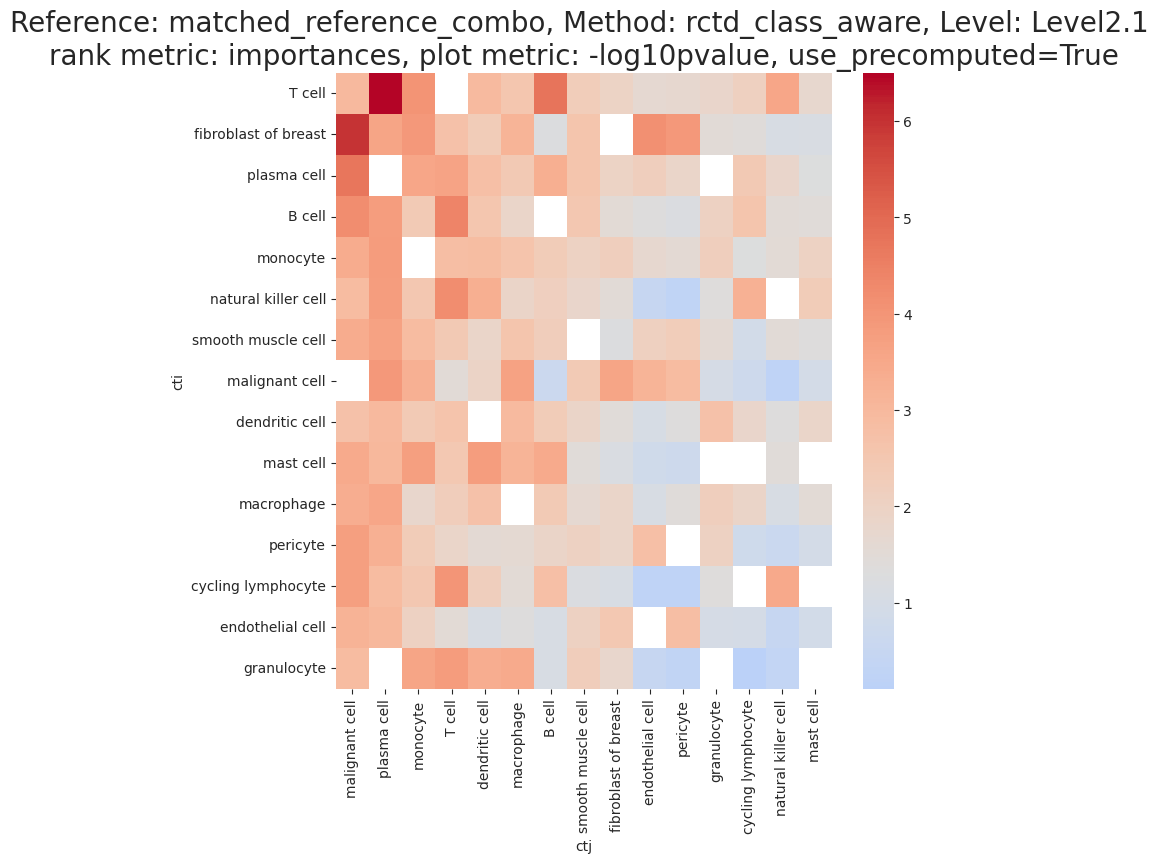

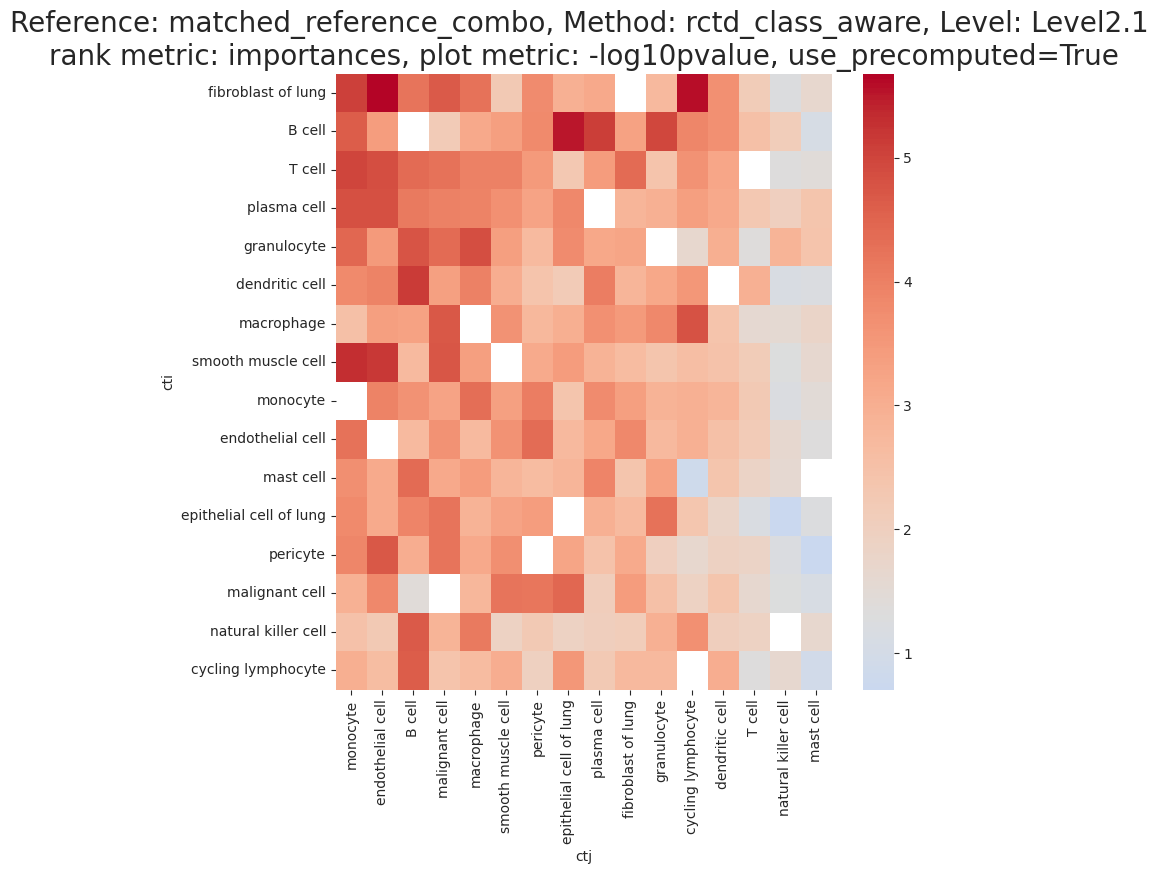

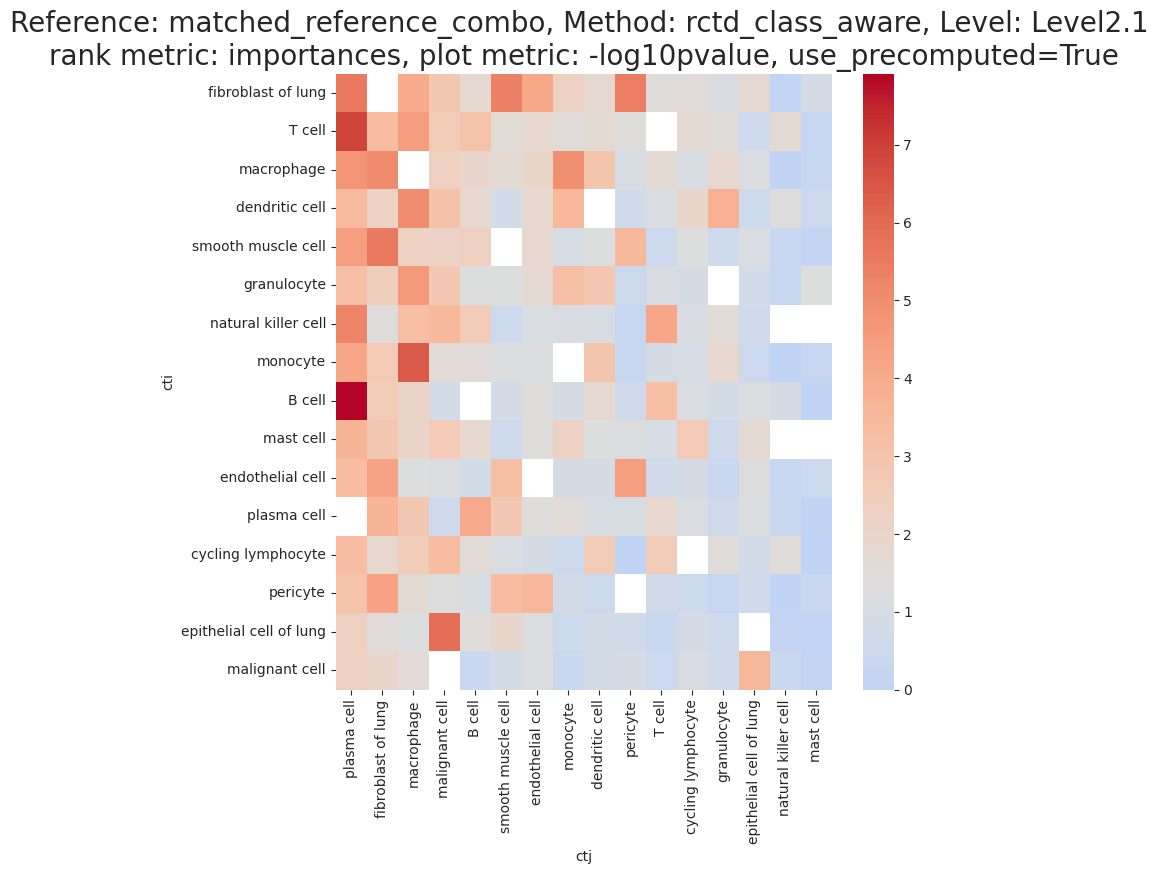

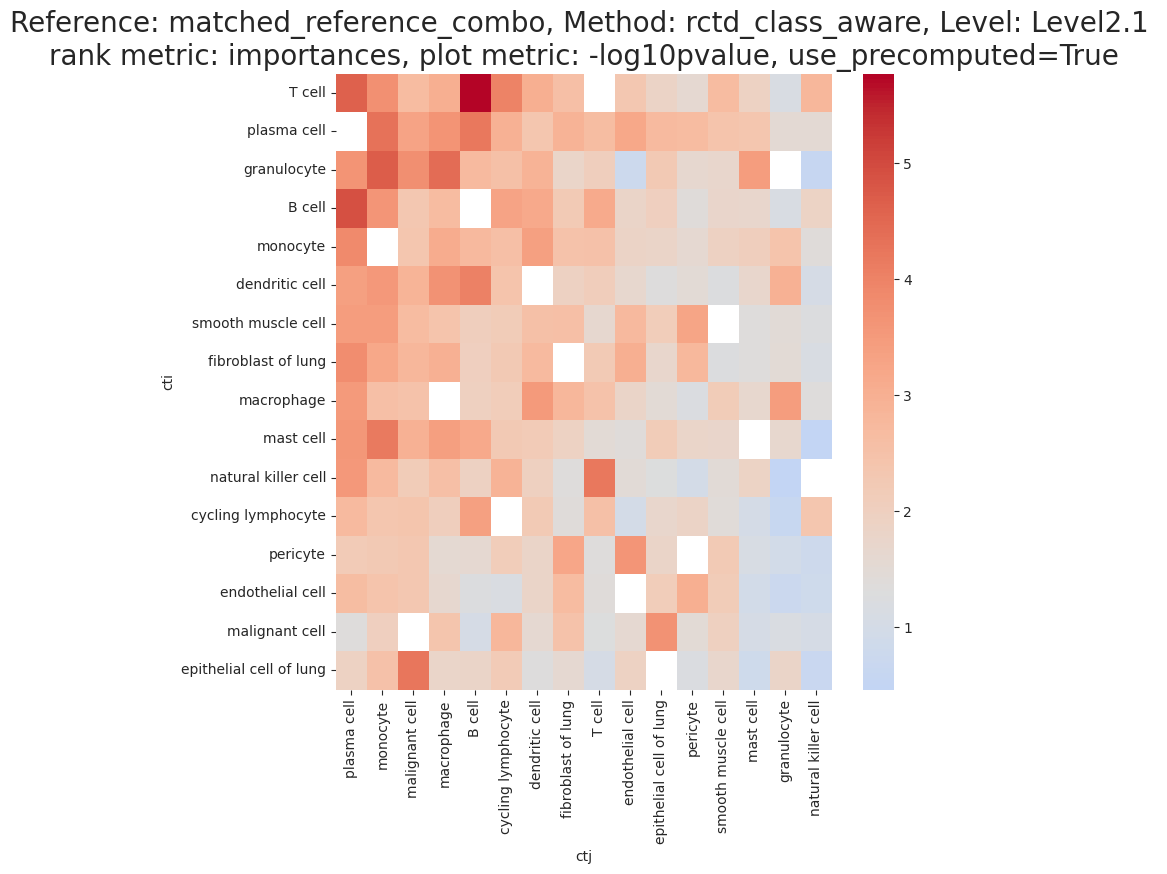

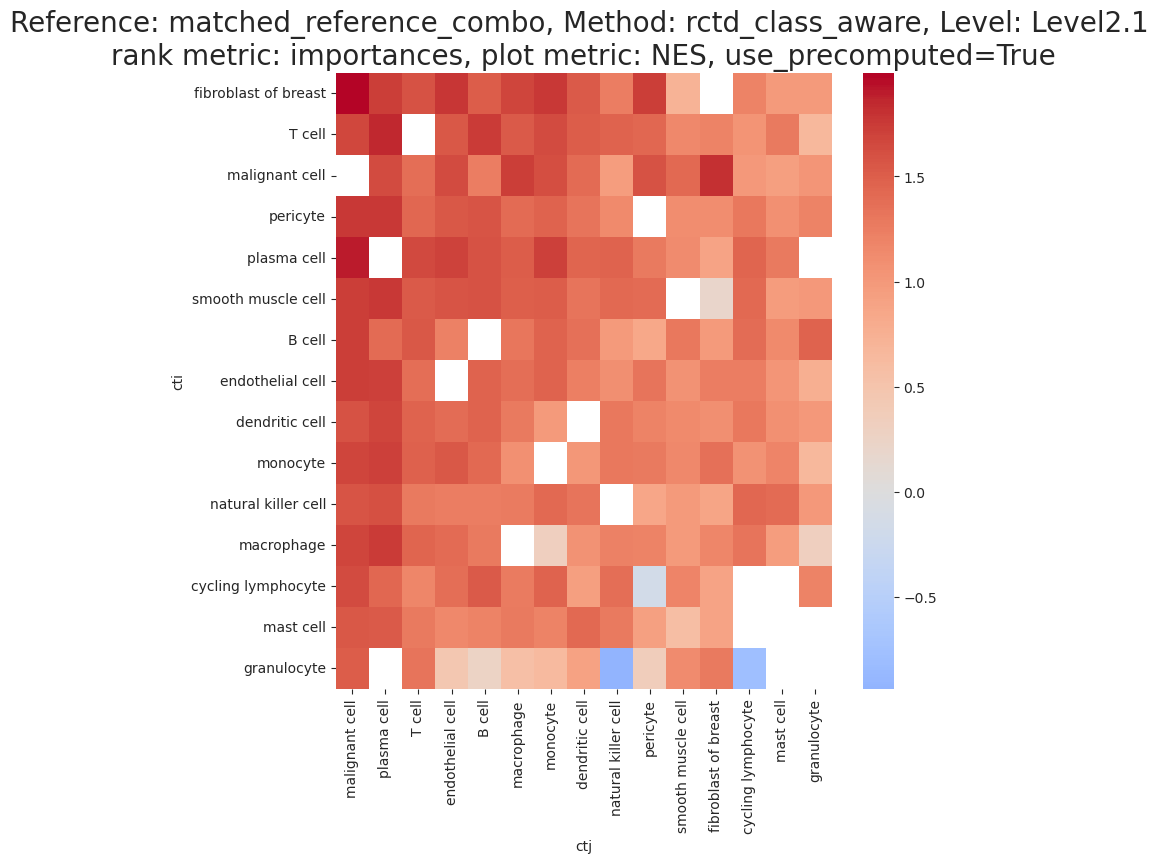

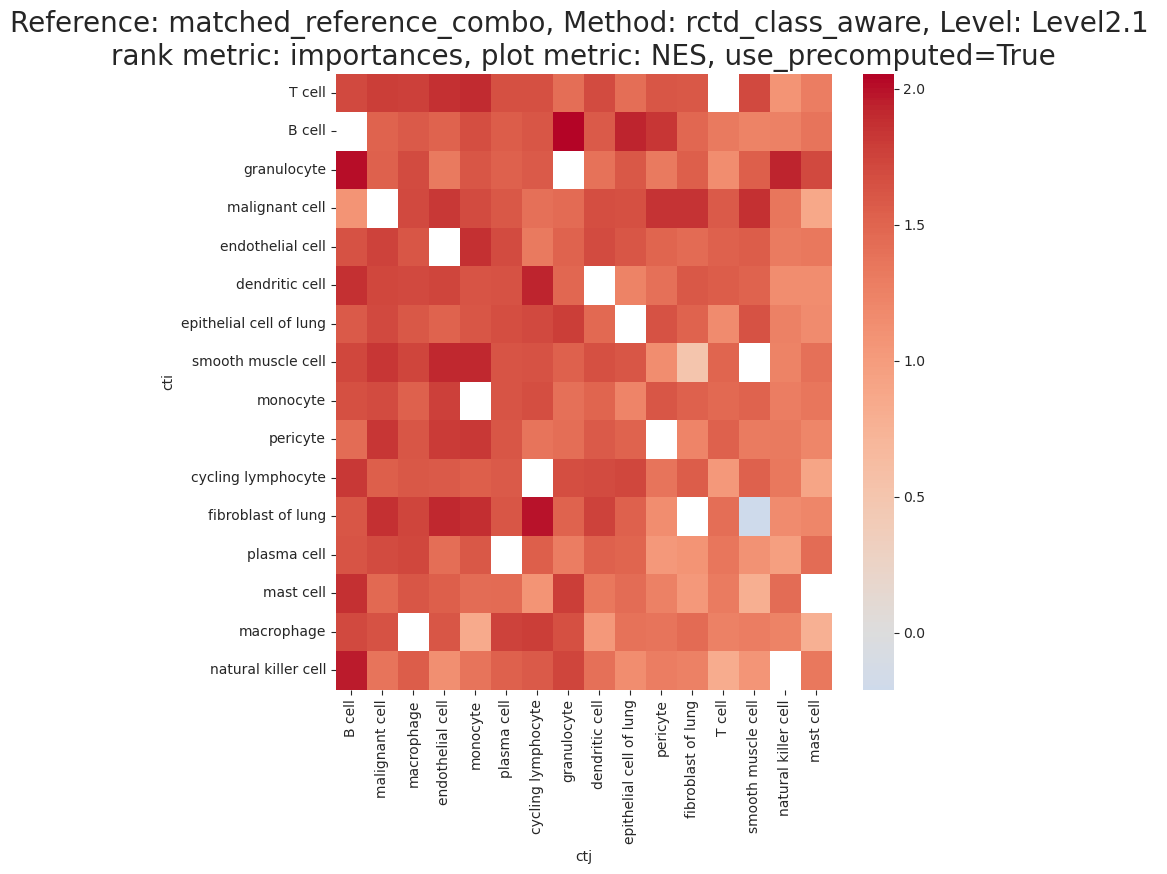

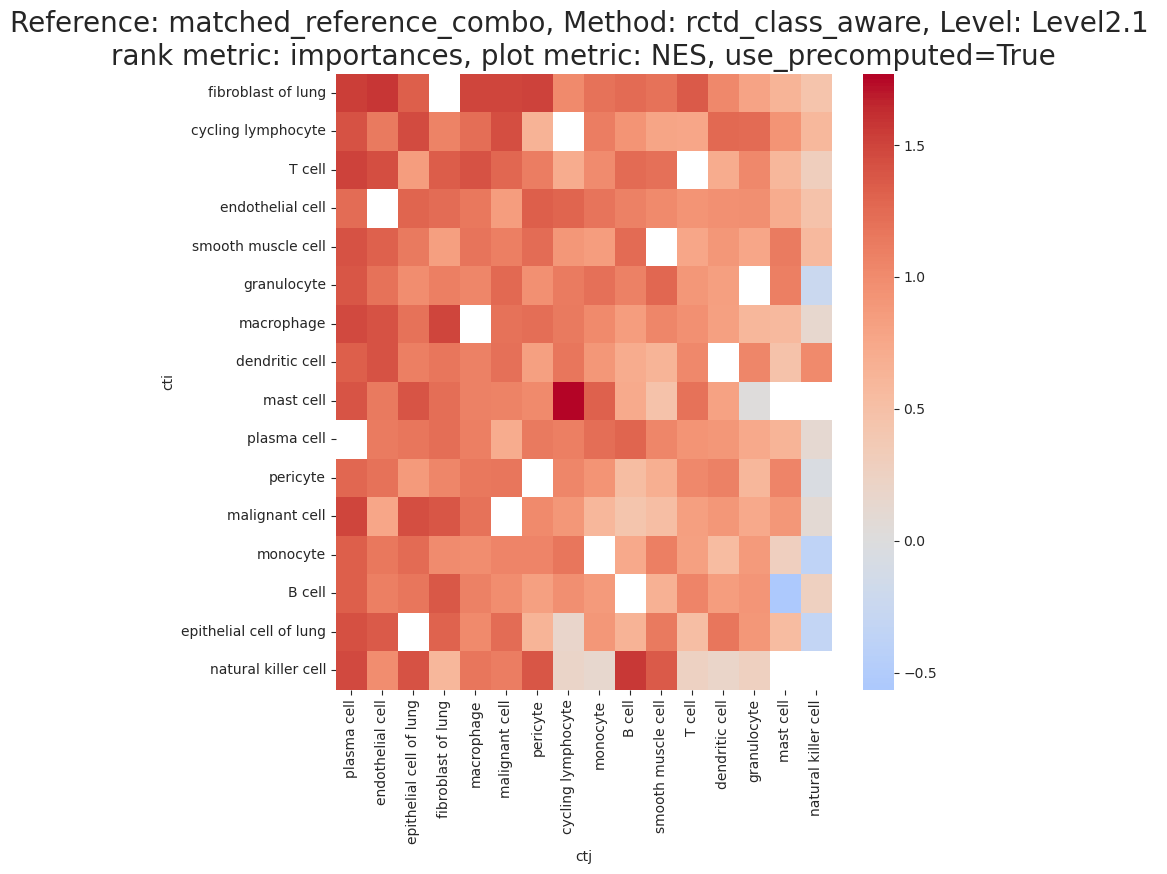

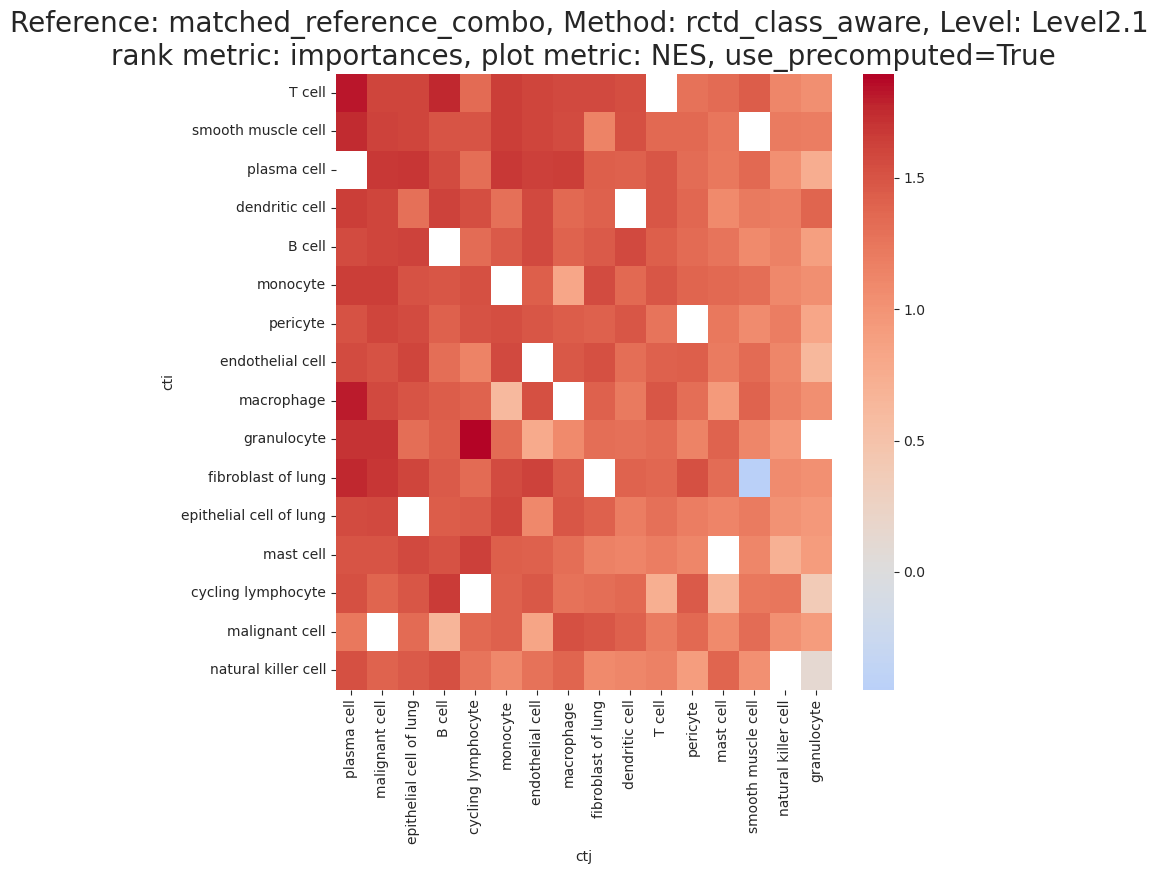

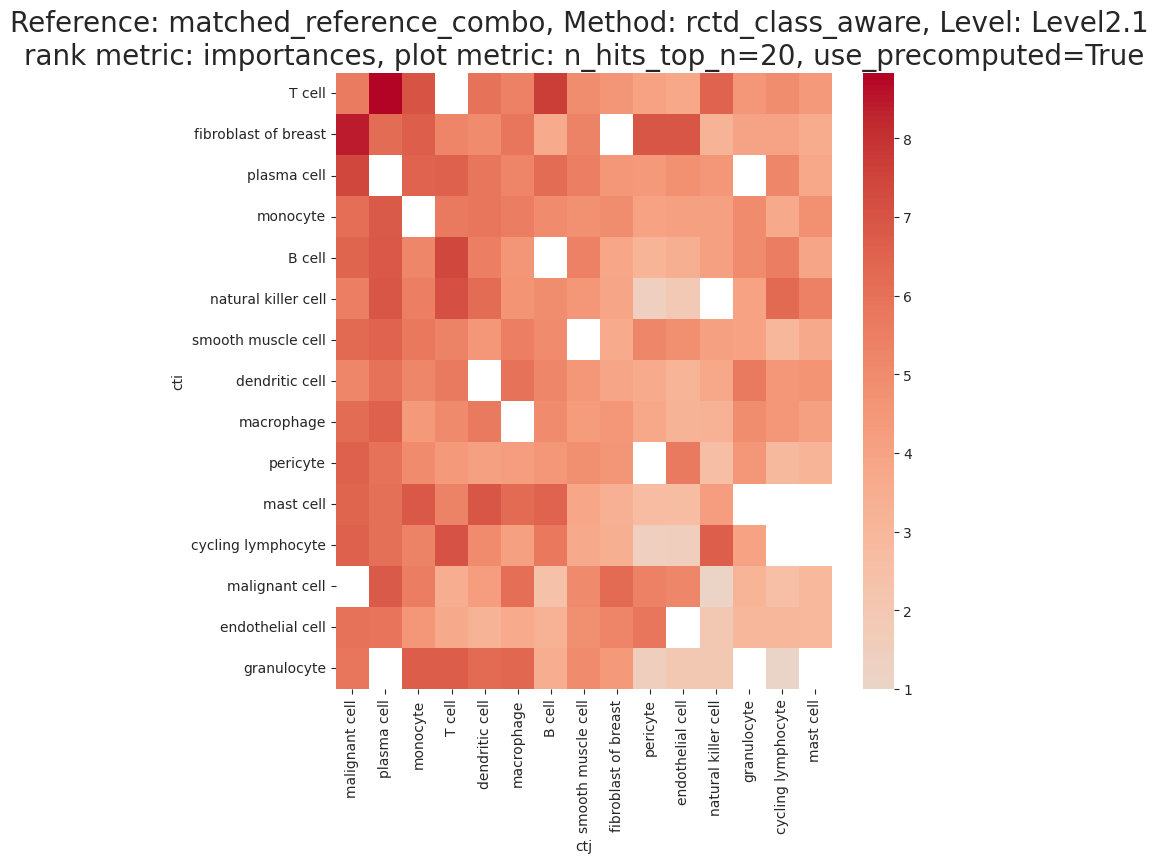

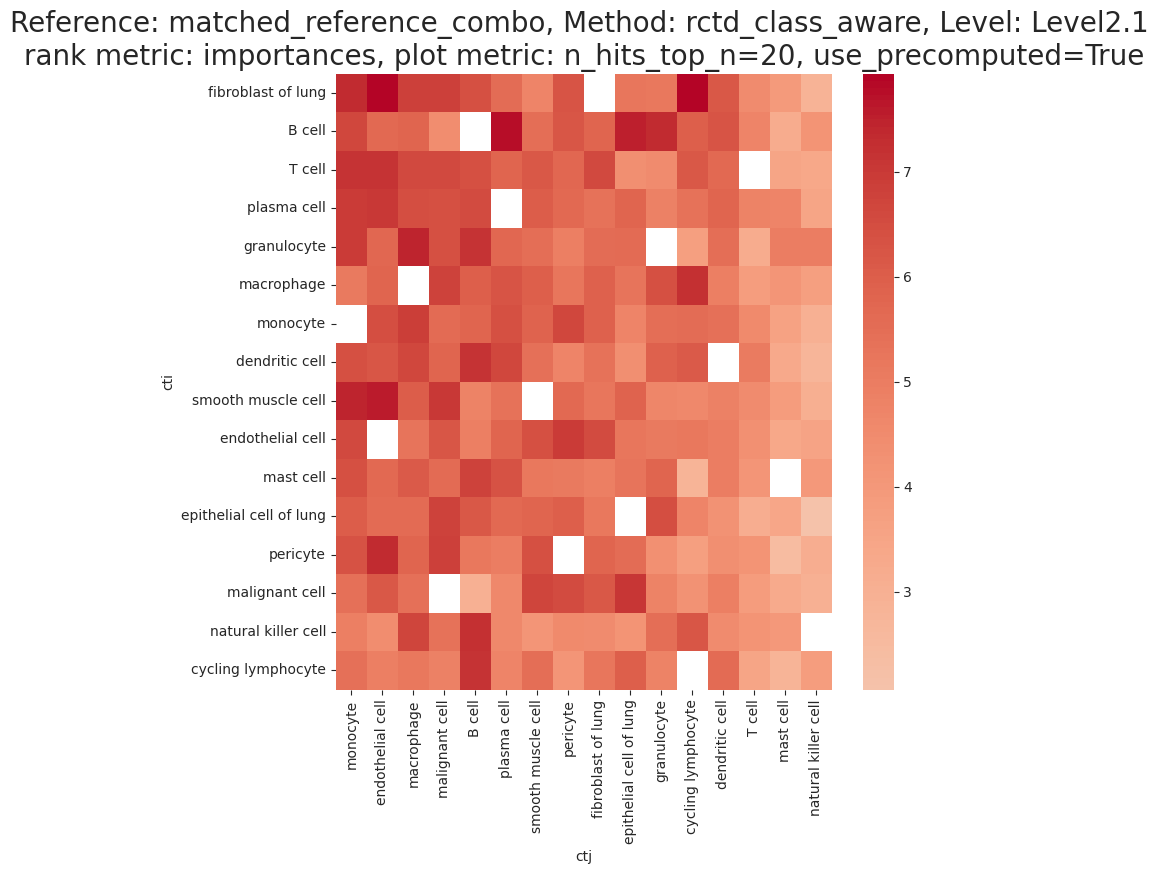

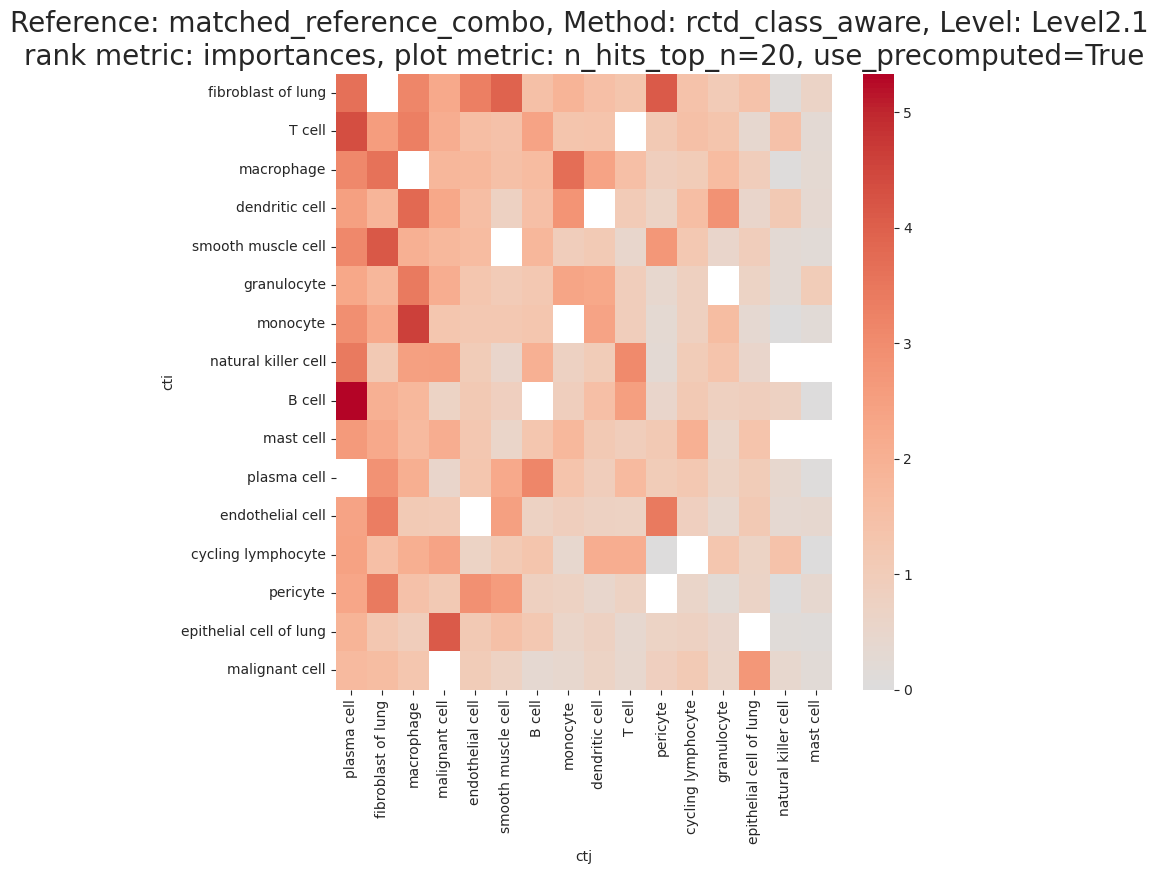

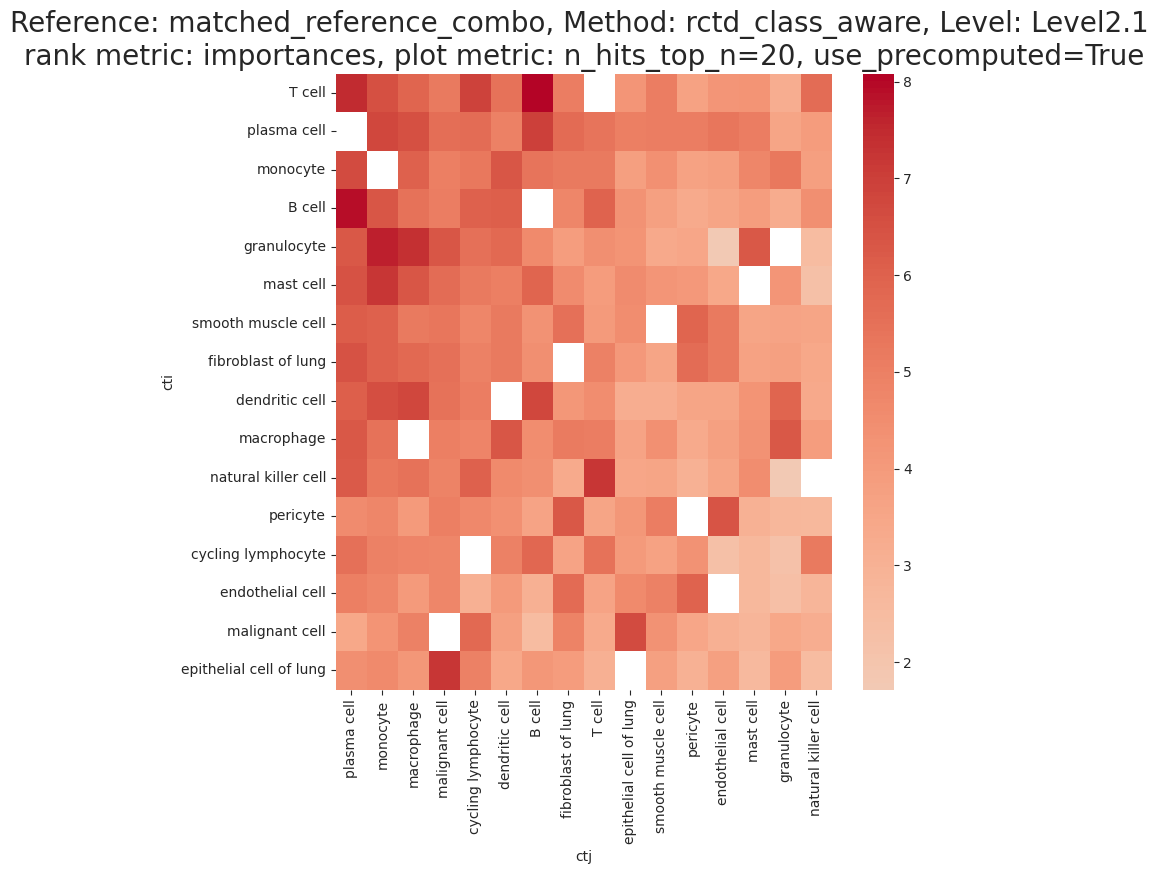

In [14]:
ref_segmentation = '10x_5um'
cti = 'T cell'
ctj = 'malignant cell'

for rank_metric in rank_metrics:
    for plot_metric in plot_metrics:
        # extract df for rank_metric used for diffexpr and plot_metric used for GSEA/hypergeometric test
        df = _utils.get_df_marker_rank_significance_plot(dfs['df_markers_rank_significance_logreg'],
                        rank_metric=rank_metric,plot_metric=plot_metric,
                        correction_methods=correction_methods,use_precomputed=use_precomputed)
        
        df[plot_metric] = df[plot_metric].astype(float)
        
        if plot_metric == 'hypergeometric_pvalue':
            df['-log10pvalue'] = -np.log10(df[plot_metric])
            plot_metric = '-log10pvalue'

        u_condition_panel = df[['condition','panel']].drop_duplicates().values

        for condition,panel in u_condition_panel:

            df_plot = df.query(f"segmentation == '{ref_segmentation}' and condition == '{condition}' and panel == '{panel}'")
            df_plot = df_plot.groupby(['cti', 'ctj'])[plot_metric].mean().unstack()
            df_plot = df_plot.loc[df_plot.sum(1).sort_values(ascending=False).index]
            df_plot = df_plot[df_plot.sum(0).sort_values(ascending=False).index]

            title = f"Reference: {reference}, Method: {method}, Level: {level} \nrank metric: {rank_metric}, plot metric: {plot_metric}, {use_precomputed=}"

            f = plt.figure(figsize=(8,8))
            ax = plt.subplot()
            ax.set_title(title,fontsize=20)
            g = sns.heatmap(df_plot,cmap='coolwarm',center=-np.log10(0.05) if plot_metric == '-log10pvalue' else 0.)
            plt.show()

# Plot results permutation f1 scores

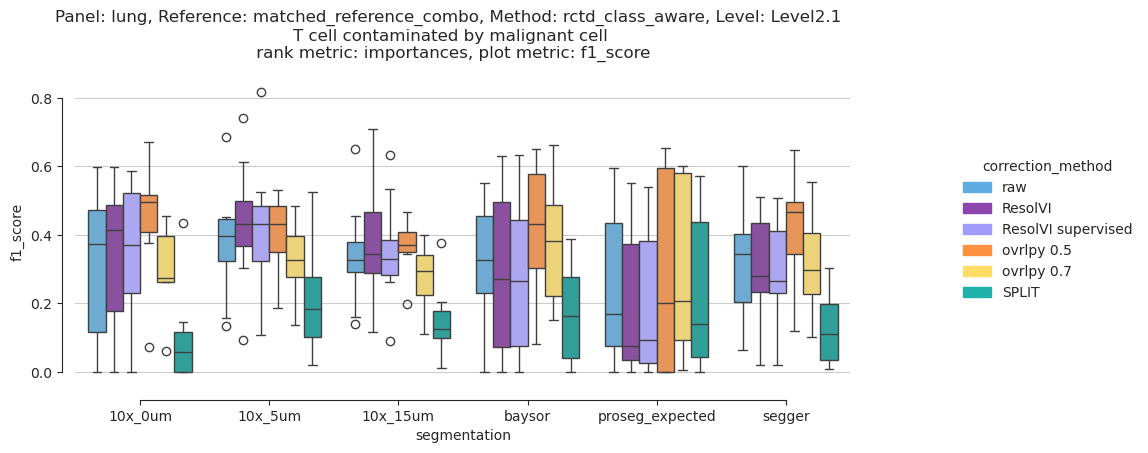

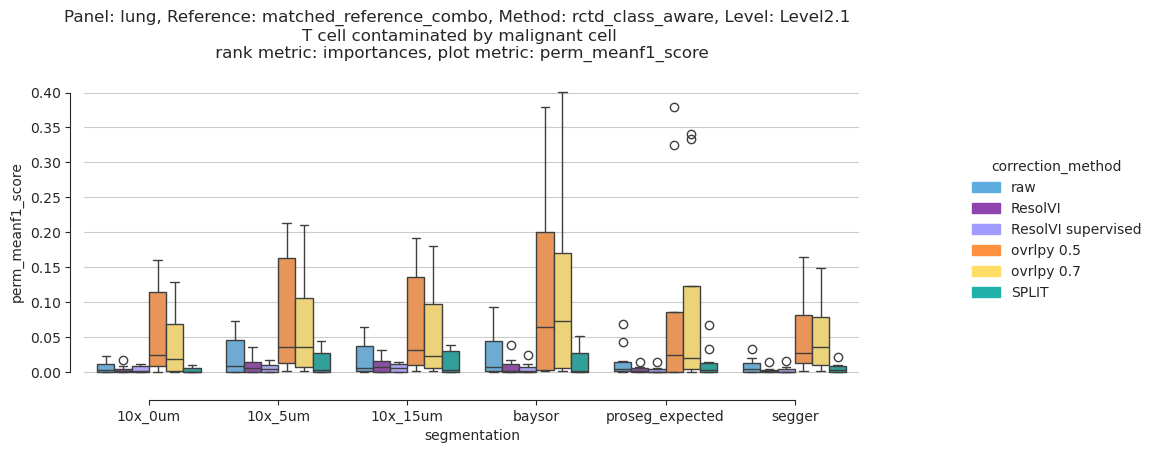

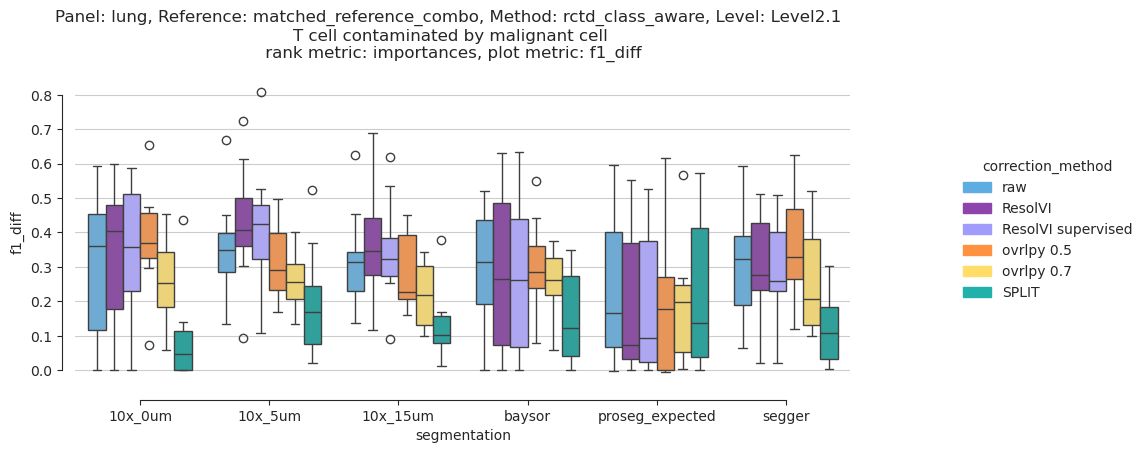

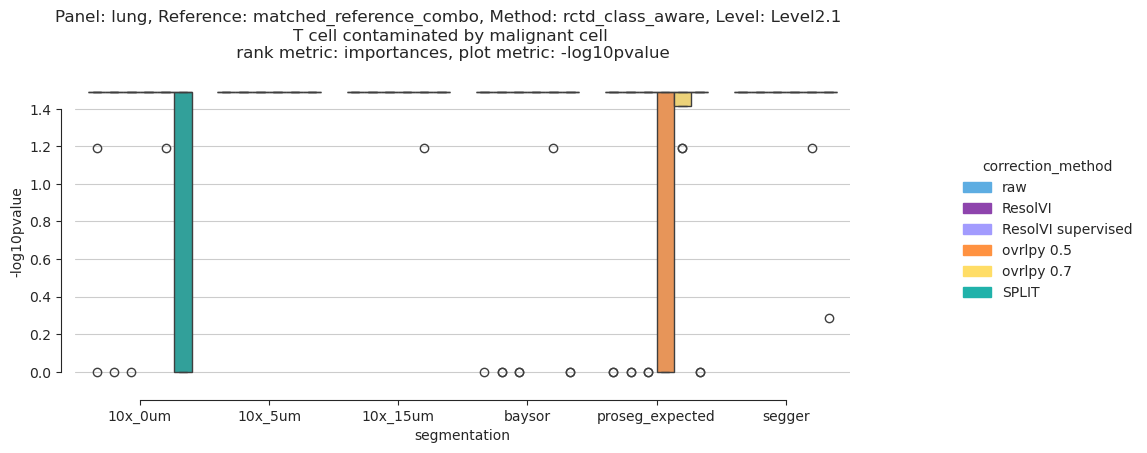

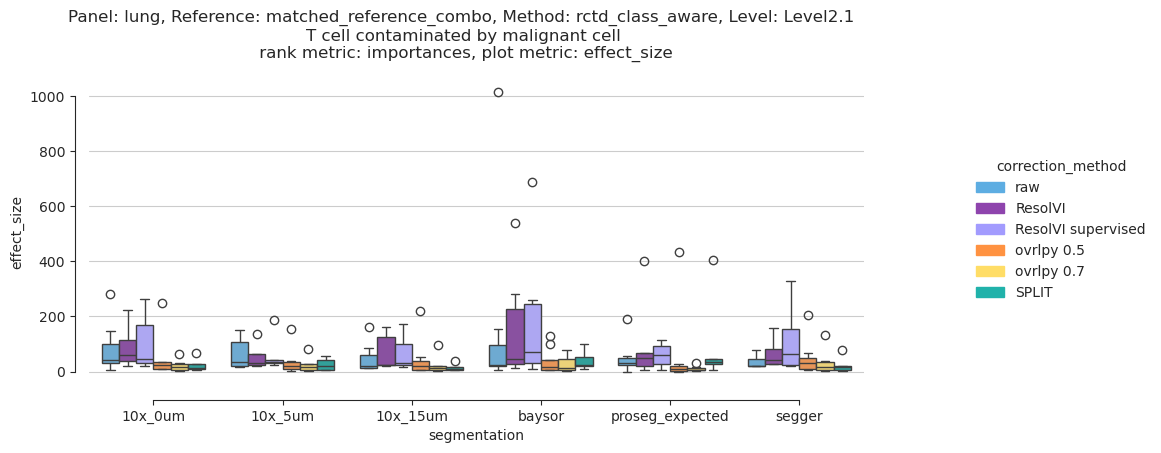

In [15]:
ref_panel = 'lung'
cti = 'T cell'
ctj = 'malignant cell'

df = _utils.get_df_permutations_logreg_plot(dfs['df_permutations_logreg'],correction_methods)
df = df.query("panel == @ref_panel and cti == @cti and ctj == @ctj")
df['f1_diff'] = df['f1_score'] - df['perm_meanf1_score']


for plot_metric in ['f1_score','perm_meanf1_score','f1_diff','p_value','effect_size']:
    if plot_metric in ['p_value']:
        df['-log10pvalue'] = -np.log10(df[plot_metric].astype(float))
        plot_metric = '-log10pvalue'

    # plotting params, palette
    title = f"Panel: {ref_panel}, Reference: {reference}, Method: {method}, Level: {level} \n{cti} contaminated by {ctj}\n rank metric: {rank_metric}, plot metric: {plot_metric}, {use_precomputed=}"
    unique_labels = [c for c in hue_correction_order if c in np.unique(df[hue_correction].dropna())]
    unique_labels = unique_labels + [c for c in np.unique(df[hue_correction].dropna()) if c not in unique_labels]
    palette = {u: palette[u] for u in unique_labels}
    legend_handles = [mpatches.Patch(color=color, label=label) for label, color in palette.items()]

    ### hypergeometric pvalue boxplot
    f = plt.figure(figsize=(10, 4))
    ax = plt.subplot()
    g = sns.boxplot(df,x='segmentation',y=plot_metric, 
                    hue=hue_correction, hue_order=unique_labels, 
                    legend=False, palette=palette,ax=ax,
                    order=[s for s in hue_segmentation_order if s in df['segmentation'].unique()],
                    # log_scale=True
                    )

    sns.despine(offset=10, trim=True)
    ax.yaxis.grid(True)

    plt.suptitle(title,y=1.05)
    f.legend(
        handles=legend_handles,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        title=hue_correction,
        frameon=False,
    )
    # plt.tight_layout(rect=[0, 0, 1, 0.95])
    # plt.savefig(out_file, dpi=dpi, bbox_inches="tight")
    plt.show()

# Plot results importances

In [ ]:
def get_df_ctj_marker_genes(dfs_ctj_marker_genes, correction_methods,):
    df_ctj_marker_genes = {}
    for correction_method in correction_methods:
        for k, v in dfs['df_ctj_marker_genes'][correction_method].items():
            for ctj in v.columns:
                df_ctj_marker_genes[(correction_method,*k,ctj)] = v[ctj]

    df_ctj_marker_genes = pd.concat(df_ctj_marker_genes).reset_index().drop('level_7',axis=1)
    df_ctj_marker_genes.columns = ['correction_method'] + xenium_levels + ['cell_type','gene']
    return df_ctj_marker_genes


df_ctj_marker_genes = get_df_ctj_marker_genes(dfs['df_ctj_marker_genes'],correction_methods)
cti = 'T cell'
ctj = 'malignant cell'
malignant_markers = df_ctj_marker_genes.query("cell_type == @ctj and correction_method == 'raw' and segmentation == '10x_5um'")['gene'].value_counts()[:20].index
t_cell_markers = df_ctj_marker_genes.query("cell_type == @cti and correction_method == 'raw' and segmentation == '10x_5um'")['gene'].value_counts()[:20].index

In [146]:
cti = 'T cell'
ctj = 'malignant cell'
ref_panel = 'lung'
# ref_segmentation = '10x_5um'

df = {}
for correction_method in correction_methods:
    for k, v in dfs['df_importances_logreg'][correction_method].items():
        if k[2] != ref_panel:
            continue
        # for (cti,ctj) in v.index.droplevel(2).unique():
        if (cti,ctj) in v.index:
            df[(correction_method, *k, cti, ctj)] = v.loc[(cti, ctj),'importances']

df = pd.DataFrame(df).T.reset_index()
df.columns = ["correction_method"] + xenium_levels + ["cti", "ctj"] + df.columns[8:].tolist()
_utils.rename_correction_methods(df)

# df = df.query("segmentation == @ref_segmentation and panel == @ref_panel and cti == @cti and ctj == @ctj")
# df = df.iloc[:,8:]
df_norm = df.copy()
df_norm.iloc[:,8:] =  df.iloc[:,8:].div(df.iloc[:,8:].abs().sum(axis=1),axis=0)

/tmp/ipykernel_2804045/2098842974.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (cti,ctj) in v.index:
/tmp/ipykernel_2804045/2098842974.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  df[(correction_method, *k, cti, ctj)] = v.loc[(cti, ctj),'importances']


[['raw', '10x_0um'],
 ['SPLIT', '10x_0um'],
 ['ResolVI', '10x_0um'],
 ['ResolVI supervised', '10x_0um'],
 ['ovrlpy 0.5', '10x_0um'],
 ['ovrlpy 0.7', '10x_0um']]

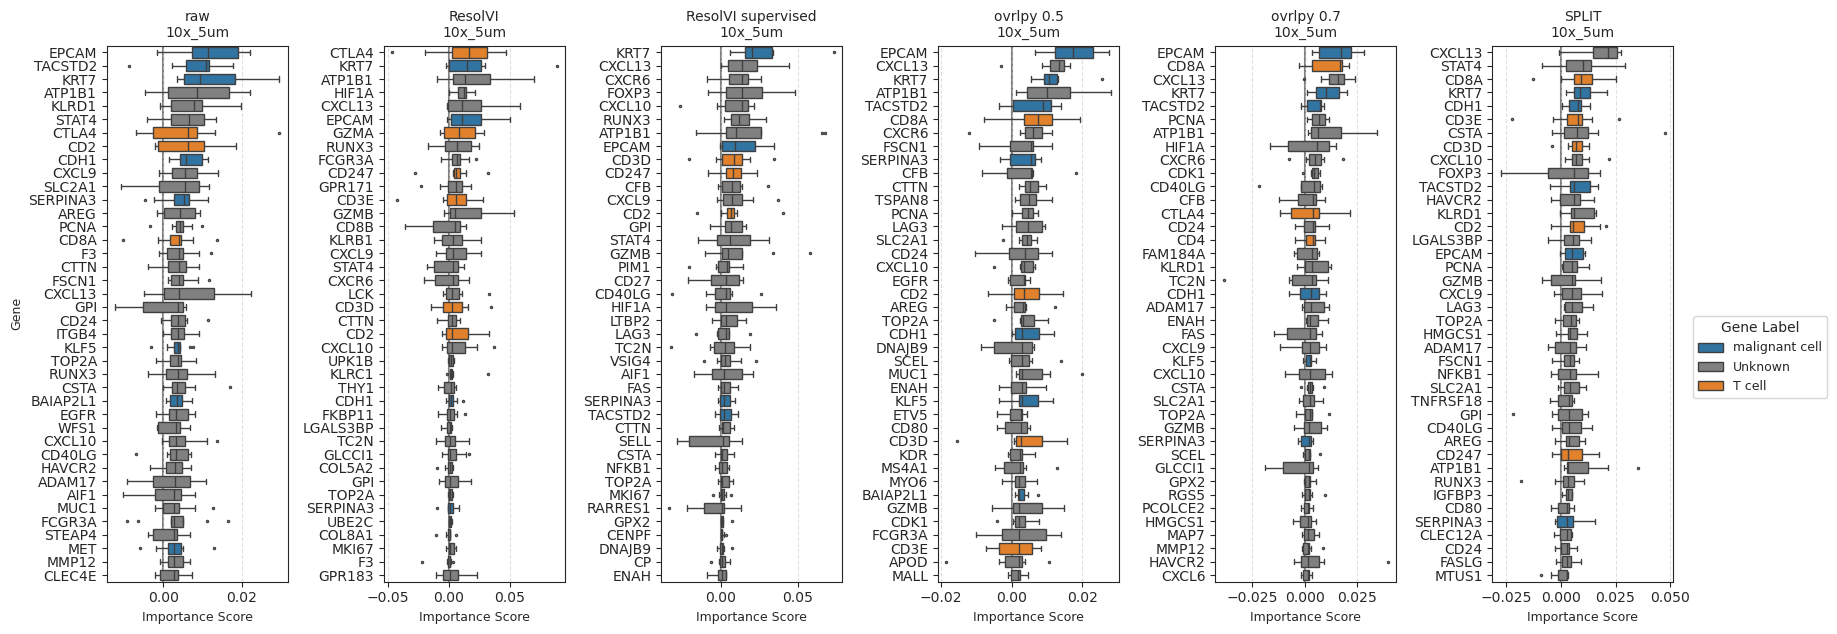

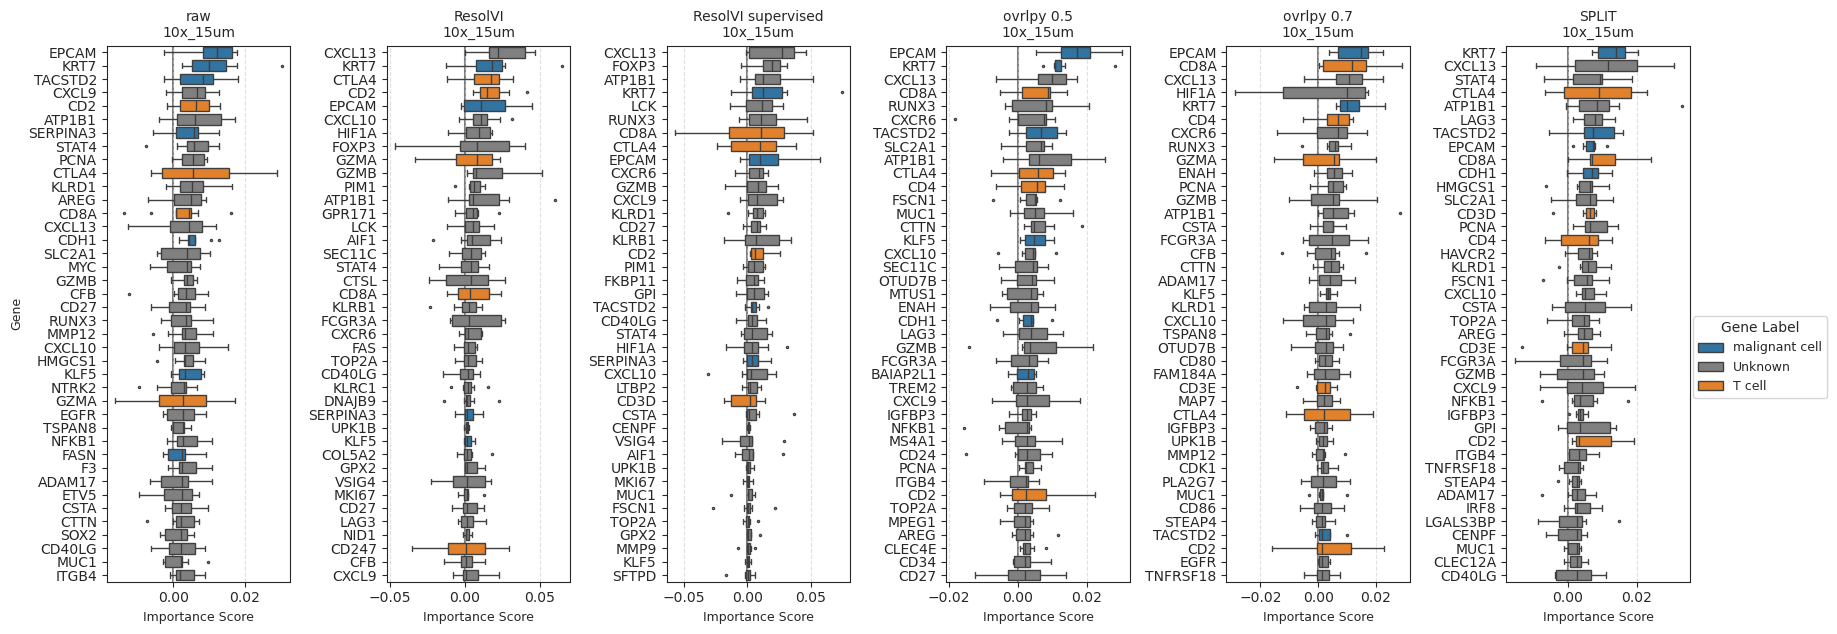

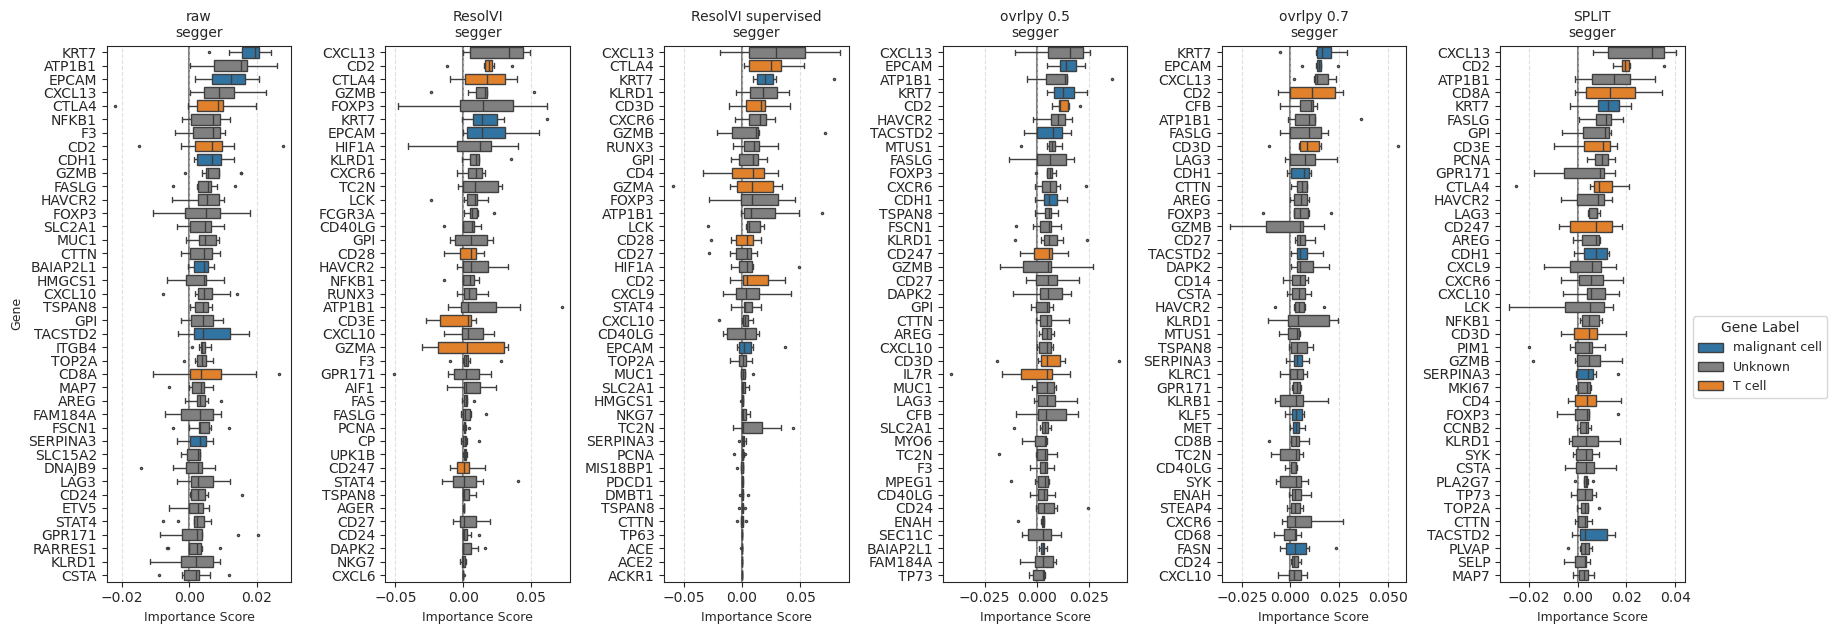

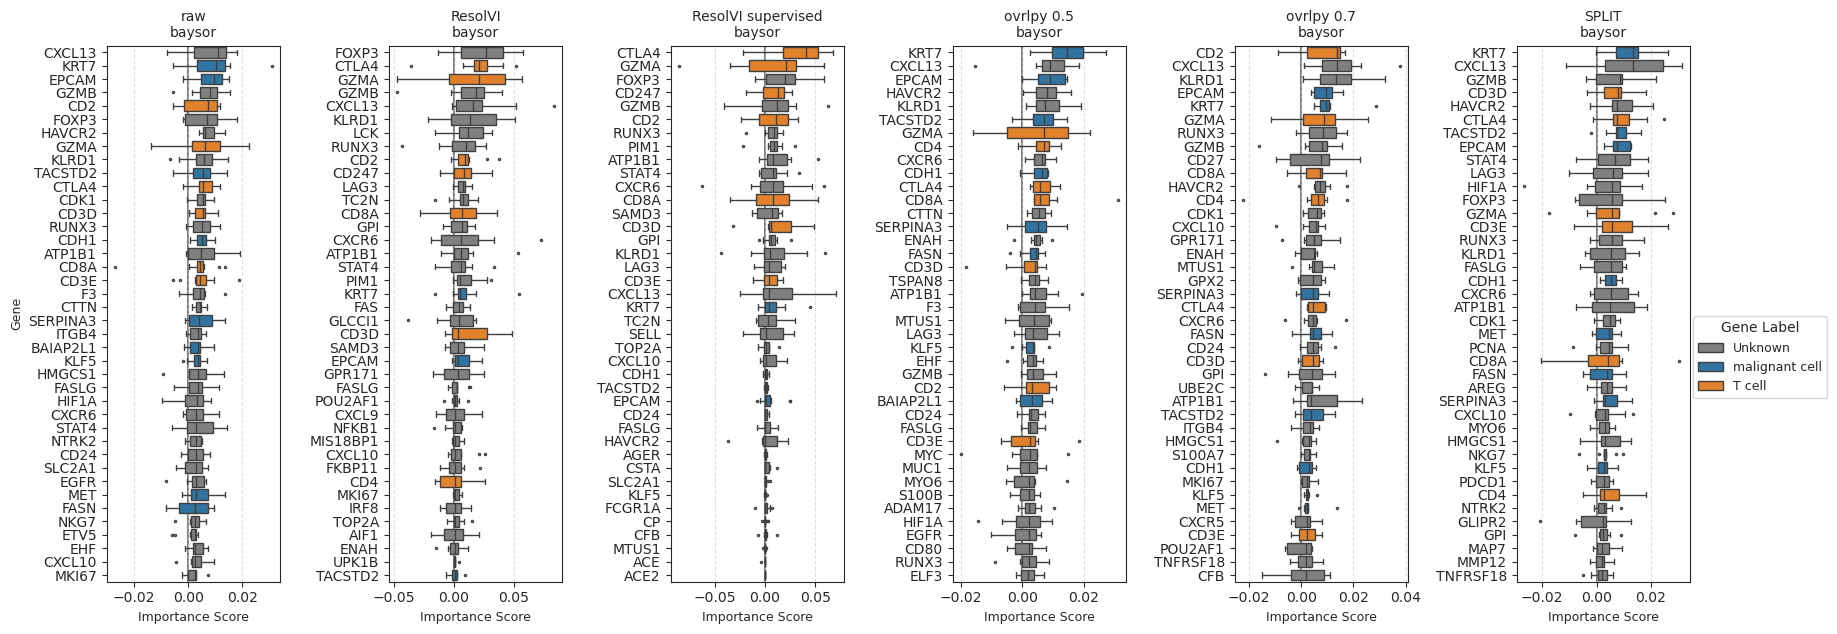

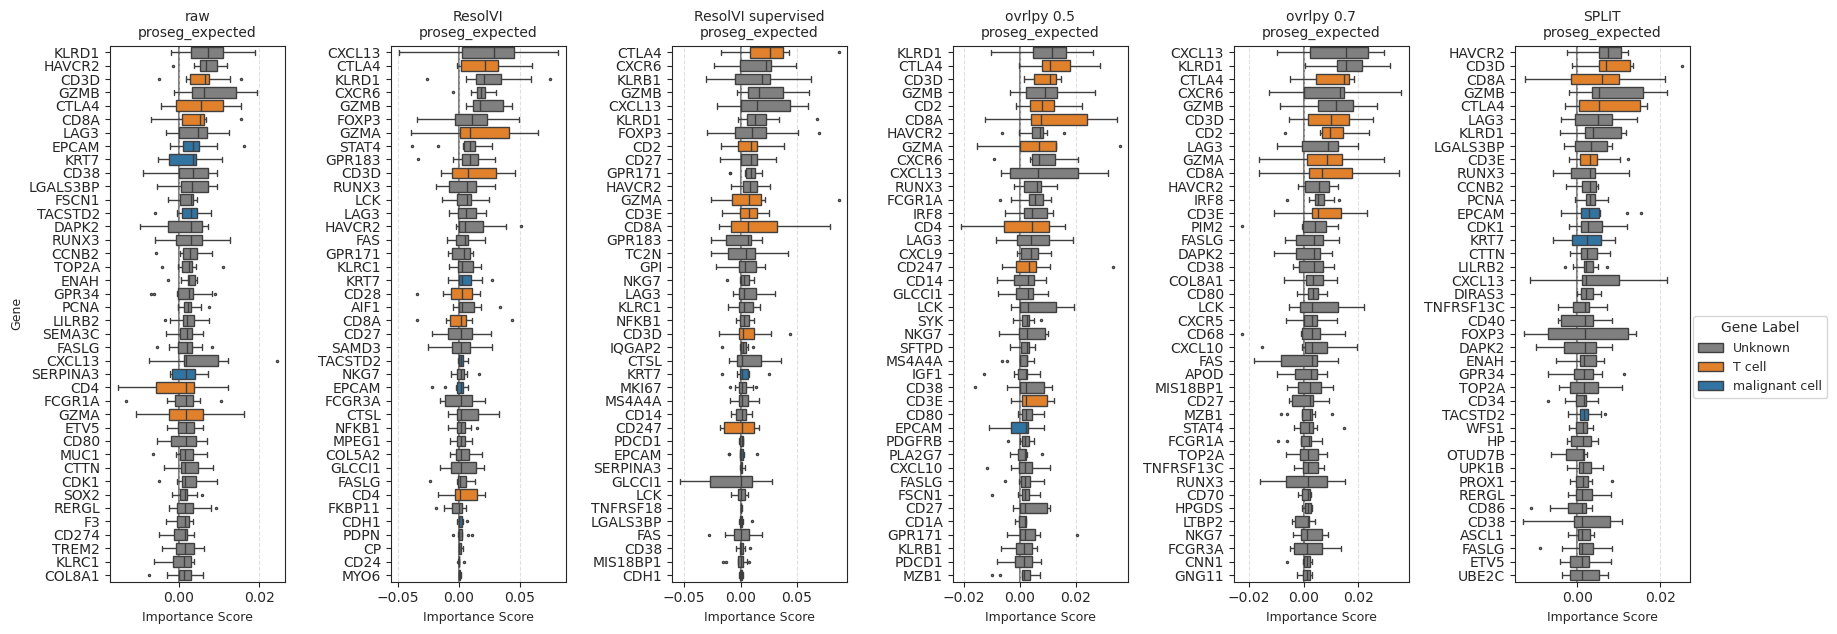

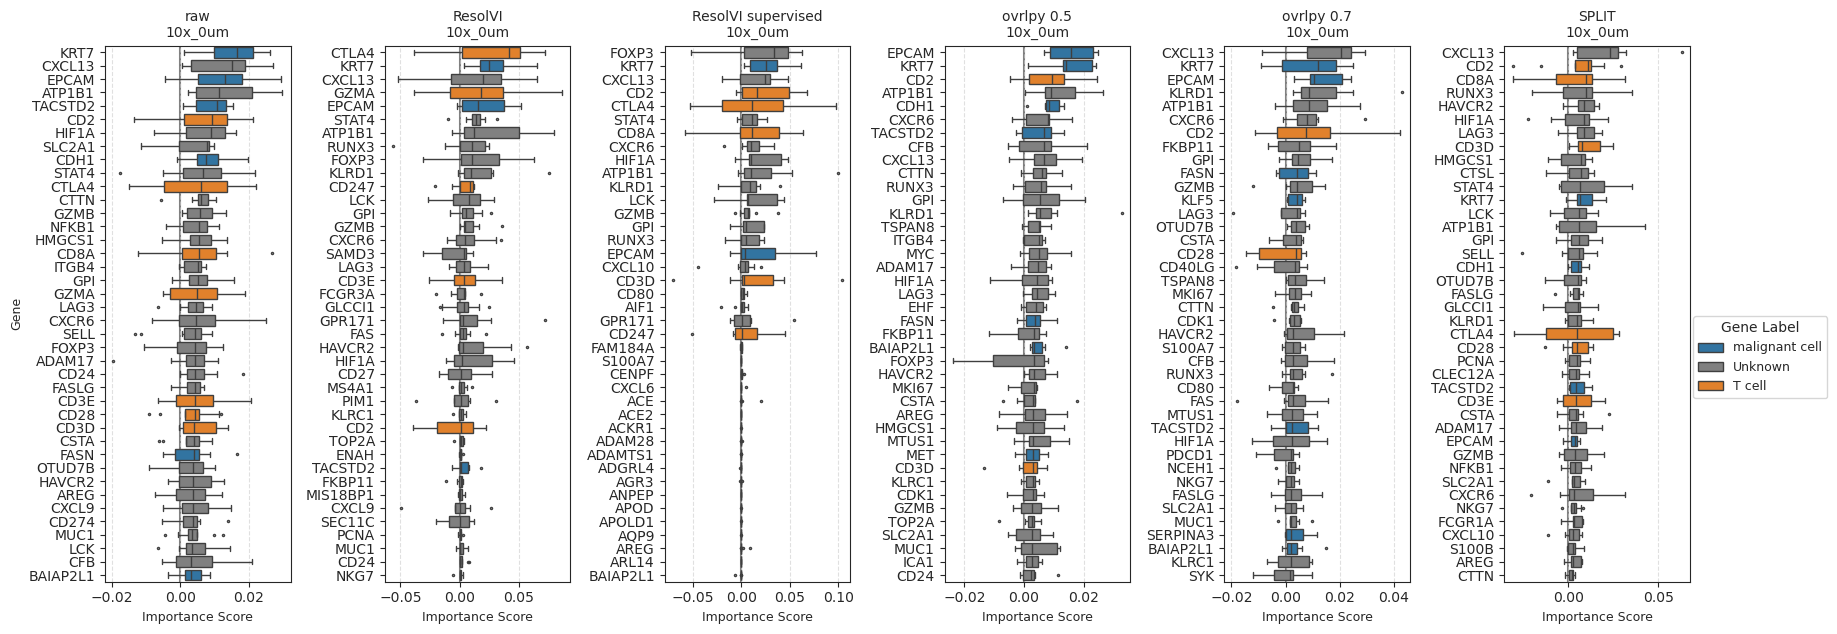

In [171]:
df_labeling_info = pd.DataFrame(columns=['Gene', 'Label'])
df_labeling_info['Gene'] = df_norm.columns[8:]
df_labeling_info['Label'] = 'unknown'

ctj_markers = [g for g in malignant_markers if g in df_labeling_info.Gene.values]
cti_markers = [g for g in t_cell_markers if g in df_labeling_info.Gene.values]
df_labeling_info.loc[df_labeling_info['Gene'].isin(ctj_markers), 'Label'] = 'malignant cell'
df_labeling_info.loc[df_labeling_info['Gene'].isin(cti_markers), 'Label'] = 'T cell'
df_labeling_info = df_labeling_info.query("Label != 'unknown'")

# --- Prepare Labeling Info ---
# Create a dictionary for quick lookup: Gene -> Label
gene_to_label = pd.Series(df_labeling_info.Label.values, index=df_labeling_info.Gene).to_dict()

# Define a color palette for the labels (important for consistency)
unique_labels = df_labeling_info['Label'].unique()
# Using a predefined qualitative palette like 'tab10' or 'Set3'
# Ensure enough colors for your labels
palette_name = 'tab10' # Or 'Set3', 'Paired', etc.
colors = sns.color_palette(palette_name, n_colors=len(unique_labels))
label_palette = dict(zip(unique_labels, colors))


# --- Identify metadata and importance (gene) columns in df_norm ---
# Assuming importance columns start after 'ctj' or are non-metadata
metadata_cols = ['correction_method', 'segmentation', 'condition', 'panel', 'donor', 'sample', 'cti', 'ctj']
# Filter out metadata columns that might not be present in all user DFs
metadata_cols_present = [col for col in metadata_cols if col in df_norm.columns]
importance_cols = df_norm.columns.difference(metadata_cols_present, sort=False).tolist()


for segmentation in df_norm['segmentation'].unique():
    # --- Get unique combinations of grouping variables ---
    groups = [[g,segmentation] for g in hue_correction_order]
    num_groups = len(groups)

    # --- Setup Subplots ---

    ncols = num_groups
    nrows = 1

    base_width_per_plot = 3  # Adjust as needed
    base_height_per_plot = 7 # Taller for vertical plots with rotated labels
    fig_width = base_width_per_plot * ncols
    fig_height = base_height_per_plot * nrows

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_width, fig_height),squeeze=False) # Ensure axes is always 2D
    axes_flat = axes.flatten()

    # --- Generate plot for each group ---
    plot_handles, plot_labels = [], [] # To collect handles/labels for a single legend

    for i, group_vals in enumerate(groups):
        correction_method, segmentation = group_vals
        ax = axes_flat[i]

        # 1. Filter df_norm for the current group
        group_df = df_norm[
            (df_norm['correction_method'] == correction_method) &
            (df_norm['segmentation'] == segmentation)
        ].copy() # Use .copy() to avoid SettingWithCopyWarning later
    
        group_importances = group_df[importance_cols]
        mean_importances = group_importances.median(axis=0).dropna()
        n_top = min(40, len(mean_importances))
        top_genes = mean_importances.nlargest(n_top).index.tolist()
        # top_genes = df_labeling_info['Gene'].values

        # 3. Prepare data for plotting: Melt and Add Labels
        # Ensure only top genes are selected *before* melting
        melt_data = group_df[top_genes]
        plot_data_long = melt_data.melt(
            var_name='Gene',
            value_name='Importance'
        )

        # **** Add the 'Label' column for coloring ****
        plot_data_long['Label'] = plot_data_long['Gene'].map(gene_to_label)
        # Handle genes that might be missing a label
        plot_data_long['Label'] = plot_data_long['Label'].fillna('Unknown')
        # Ensure 'Unknown' has a color if it arises
        if 'Unknown' not in label_palette and 'Unknown' in plot_data_long['Label'].unique():
                label_palette['Unknown'] = '#808080' # Add grey for unknown

        # Check if any labels were actually assigned
        hue_param = 'Label'
        palette_param = label_palette

        sns.boxplot(
            data=plot_data_long,
            x='Importance',          # Genes on X-axis -> Vertical boxes
            y='Gene',    # Values on Y-axis
            hue=hue_param,     # Color by the 'Label' column
            order=top_genes,   # Order genes by mean importance
            palette=palette_param, # Use the defined label-color mapping
            dodge=False,       # Don't shift boxes for hue, color the whole box
            ax=ax,             # Draw on the correct subplot axis
            fliersize=1.5
        )

        # 5. Customize the SUBPLOT
        ax.set_title(f'{correction_method}\n{segmentation}', fontsize=10)
        # ax.tick_params(axis='x', rotation=90, labelsize=8)
        # ax.tick_params(axis='y', labelsize=8)
        ax.grid(axis='x', linestyle='--', alpha=0.6)
        ax.axvline(0.0, color='k', linestyle='-', zorder=-1, alpha=0.5)
        ax.set_xlabel('Importance Score', fontsize=9)

        if i % ncols == 0:
            ax.set_ylabel('Gene', fontsize=9)
        else:
            ax.set_ylabel('')

        # Remove individual subplot legends if hue was used (will create one below)
        if hue_param:
                # Collect handles/labels from the first plot that has a legend
                if not plot_labels and ax.get_legend() is not None:
                    handles, labels = ax.get_legend_handles_labels()
                    # Use a dictionary to ensure unique labels/handles
                    unique_hl = dict(zip(labels, handles))
                    plot_handles = list(unique_hl.values())
                    plot_labels = list(unique_hl.keys())

                if ax.get_legend() is not None:
                    ax.get_legend().remove()


    # --- Final Plot Adjustments ---
    # Hide unused subplots
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].axis('off')

    # Add a single legend for the whole figure if labels were used
    if plot_labels:
        # Adjust legend position: place it outside the top right corner
        fig.legend(handles=plot_handles, labels=plot_labels, title="Gene Label",
                    bbox_to_anchor=(.94, 0.5), loc='upper left', fontsize=9, title_fontsize=10)

    # plt.suptitle('Top 20 Feature Importances per Condition', fontsize=16, y=.95)
    # Adjust layout carefully to make space for suptitle and potential legend
    fig.tight_layout(rect=[0, 0.03, 0.95, 0.95]) # Adjust right margin for legend if needed (e.g., 0.9 or 0.85)
    plt.show()

# Plot shared 

Using palette 'tab10' for labels: ['malignant cell', 'T cell']
Label-Color mapping: {'malignant cell': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'T cell': (1.0, 0.4980392156862745, 0.054901960784313725)}

Identified 289 importance columns in df_norm, starting with: ACE

Creating 1x6 grid for 6 groups...


/tmp/ipykernel_2804045/4104619769.py:112: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  plot_data_long['Label'].fillna('Unknown', inplace=True)
/tmp/ipykernel_2804045/4104619769.py:112: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

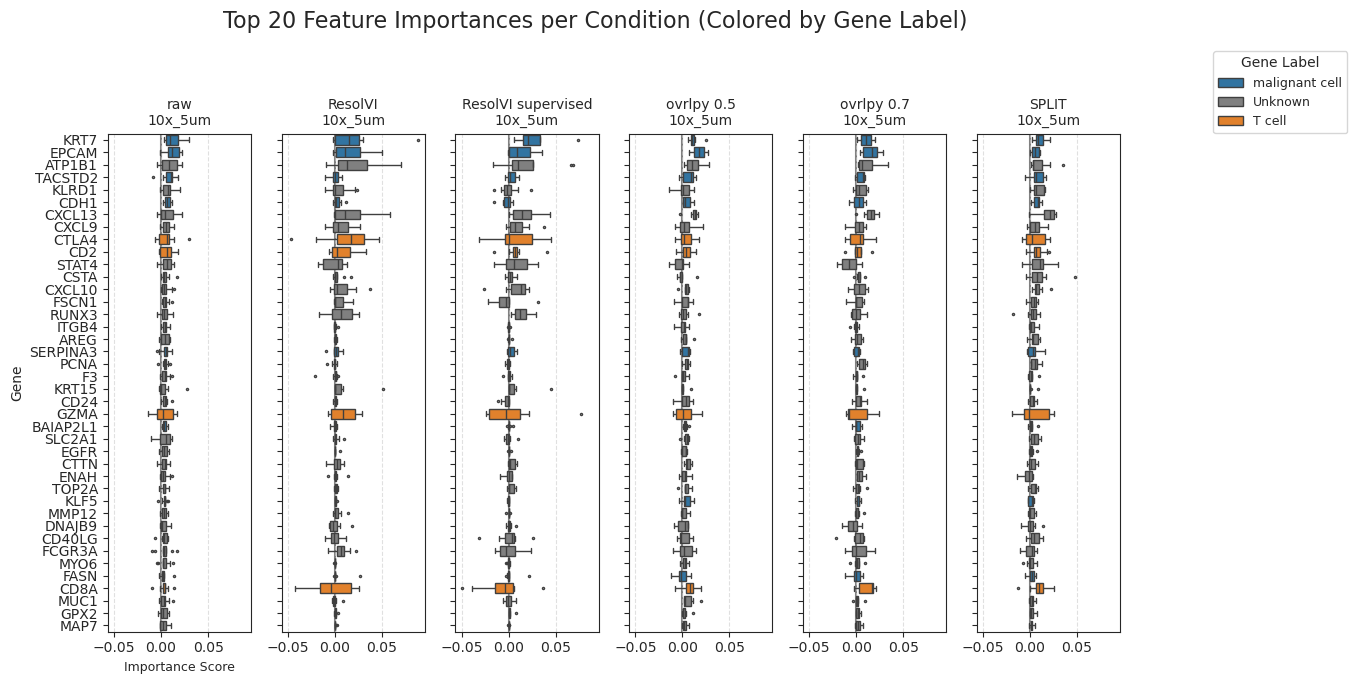

In [ ]:
df_labeling_info = pd.DataFrame(columns=['Gene', 'Label'])
df_labeling_info['Gene'] = df_norm.columns[8:]
df_labeling_info['Label'] = 'unknown'

ctj_markers = [g for g in malignant_markers if g in df_labeling_info.Gene.values]
cti_markers = [g for g in t_cell_markers if g in df_labeling_info.Gene.values]
df_labeling_info.loc[df_labeling_info['Gene'].isin(ctj_markers), 'Label'] = 'malignant cell'
df_labeling_info.loc[df_labeling_info['Gene'].isin(cti_markers), 'Label'] = 'T cell'
df_labeling_info = df_labeling_info.query("Label != 'unknown'")

# --- Prepare Labeling Info ---
# Create a dictionary for quick lookup: Gene -> Label
gene_to_label = pd.Series(df_labeling_info.Label.values, index=df_labeling_info.Gene).to_dict()

# Define a color palette for the labels (important for consistency)
unique_labels = df_labeling_info['Label'].unique()
# Using a predefined qualitative palette like 'tab10' or 'Set3'
# Ensure enough colors for your labels
palette_name = 'tab10' # Or 'Set3', 'Paired', etc.
colors = sns.color_palette(palette_name, n_colors=len(unique_labels))
label_palette = dict(zip(unique_labels, colors))
print(f"Using palette '{palette_name}' for labels: {list(unique_labels)}")
print(f"Label-Color mapping: {label_palette}")


# --- Identify metadata and importance (gene) columns in df_norm ---
# Assuming importance columns start after 'ctj' or are non-metadata
metadata_cols = ['correction_method', 'segmentation', 'condition', 'panel', 'donor', 'sample', 'cti', 'ctj']
# Filter out metadata columns that might not be present in all user DFs
metadata_cols_present = [col for col in metadata_cols if col in df_norm.columns]
importance_cols = df_norm.columns.difference(metadata_cols_present, sort=False).tolist()

if not importance_cols:
    raise ValueError("Could not identify any importance columns in df_norm.")
print(f"\nIdentified {len(importance_cols)} importance columns in df_norm, starting with: {importance_cols[0]}")

# --- Get unique combinations of grouping variables ---
grouping_variables = ['correction_method', 'segmentation']
groups = df_norm[grouping_variables].drop_duplicates()
groups = groups.set_index('correction_method').loc[hue_correction_order].reset_index().values.tolist()
num_groups = len(groups)

# --- Setup Subplots ---

ncols = num_groups
nrows = 1

base_width_per_plot = 2  # Adjust as needed
base_height_per_plot = 7 # Taller for vertical plots with rotated labels
fig_width = base_width_per_plot * ncols
fig_height = base_height_per_plot * nrows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_width, fig_height),
                            sharex=True,
                            sharey=True, # Share Y-axis
                            squeeze=False) # Ensure axes is always 2D
axes_flat = axes.flatten()
print(f"\nCreating {nrows}x{ncols} grid for {num_groups} groups...")

# --- Generate plot for each group ---
plot_handles, plot_labels = [], [] # To collect handles/labels for a single legend

for i, group_vals in enumerate(groups):
    correction_method, segmentation = group_vals
    ax = axes_flat[i]

    # 1. Filter df_norm for the current group
    group_df = df_norm[
        (df_norm['correction_method'] == correction_method) &
        (df_norm['segmentation'] == segmentation)
    ].copy() # Use .copy() to avoid SettingWithCopyWarning later

    if group_df.empty:
        ax.set_title(f'{correction_method}\n{segmentation}\n(No Data)', fontsize=9)
        ax.axis('off')
        continue

    # 2. Select importance columns & Calculate mean importance for top genes
    group_importances = group_df[importance_cols]
    if group_importances.empty or group_importances.shape[1] == 0:
        ax.set_title(f'{correction_method}\n{segmentation}\n(No Imp. Data)', fontsize=9)
        ax.axis('off')
        continue

    mean_importances = group_importances.mean(axis=0).dropna()
    if mean_importances.empty:
        ax.set_title(f'{correction_method}\n{segmentation}\n(Calc Error)', fontsize=9)
        ax.axis('off')
        continue

    n_top = min(40, len(mean_importances))
    if n_top == 0:
        ax.set_title(f'{correction_method}\n{segmentation}\n(No Genes)', fontsize=9)
        ax.axis('off')
        continue
    
    if i == 0:
        top_genes = mean_importances.nlargest(n_top).index.tolist()
    # top_genes = df_labeling_info['Gene'].values

    # 3. Prepare data for plotting: Melt and Add Labels
    # Ensure only top genes are selected *before* melting
    melt_data = group_df[top_genes]
    plot_data_long = melt_data.melt(
        var_name='Gene',
        value_name='Importance'
    )

    # **** Add the 'Label' column for coloring ****
    plot_data_long['Label'] = plot_data_long['Gene'].map(gene_to_label)
    # Handle genes that might be missing a label
    plot_data_long['Label'].fillna('Unknown', inplace=True)
    # Ensure 'Unknown' has a color if it arises
    if 'Unknown' not in label_palette and 'Unknown' in plot_data_long['Label'].unique():
            label_palette['Unknown'] = '#808080' # Add grey for unknown

    # Check if any labels were actually assigned
    if plot_data_long['Label'].nunique() == 0 or plot_data_long['Label'].isnull().all():
            print("  Warning: Could not assign labels to any genes in this group.")
            # Proceed without hue if no labels found
            hue_param = None
            palette_param = None # Or a single color palette
    else:
            hue_param = 'Label'
            palette_param = label_palette


    sns.boxplot(
        data=plot_data_long,
        x='Importance',          # Genes on X-axis -> Vertical boxes
        y='Gene',    # Values on Y-axis
        hue=hue_param,     # Color by the 'Label' column
        order=top_genes,   # Order genes by mean importance
        palette=palette_param, # Use the defined label-color mapping
        dodge=False,       # Don't shift boxes for hue, color the whole box
        ax=ax,             # Draw on the correct subplot axis
        fliersize=1.5
    )

    # 5. Customize the SUBPLOT
    ax.set_title(f'{correction_method}\n{segmentation}', fontsize=10)
    # ax.tick_params(axis='x', rotation=90, labelsize=8)
    # ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    # ax.set_xlabel('') # Remove x-axis label (genes are the labels)
    ax.axvline(0.0, color='k', linestyle='-', zorder=-1, alpha=0.5)

    if i % ncols == 0:
        ax.set_xlabel('Importance Score', fontsize=9)
    else:
        ax.set_xlabel('')

    # Remove individual subplot legends if hue was used (will create one below)
    if hue_param:
            # Collect handles/labels from the first plot that has a legend
            if not plot_labels and ax.get_legend() is not None:
                handles, labels = ax.get_legend_handles_labels()
                # Use a dictionary to ensure unique labels/handles
                unique_hl = dict(zip(labels, handles))
                plot_handles = list(unique_hl.values())
                plot_labels = list(unique_hl.keys())

            if ax.get_legend() is not None:
                ax.get_legend().remove()


# --- Final Plot Adjustments ---
# Hide unused subplots
for j in range(i + 1, len(axes_flat)):
    axes_flat[j].axis('off')

# Add a single legend for the whole figure if labels were used
if plot_labels:
    # Adjust legend position: place it outside the top right corner
    fig.legend(handles=plot_handles, labels=plot_labels, title="Gene Label",
                bbox_to_anchor=(1.01, 0.95), loc='upper left', fontsize=9, title_fontsize=10)

plt.suptitle('Top 20 Feature Importances per Condition (Colored by Gene Label)', fontsize=16, y=1.0)
# Adjust layout carefully to make space for suptitle and potential legend
fig.tight_layout(rect=[0, 0.03, 0.95, 0.95]) # Adjust right margin for legend if needed (e.g., 0.9 or 0.85)


# --- Show the combined plot ---
plt.show()

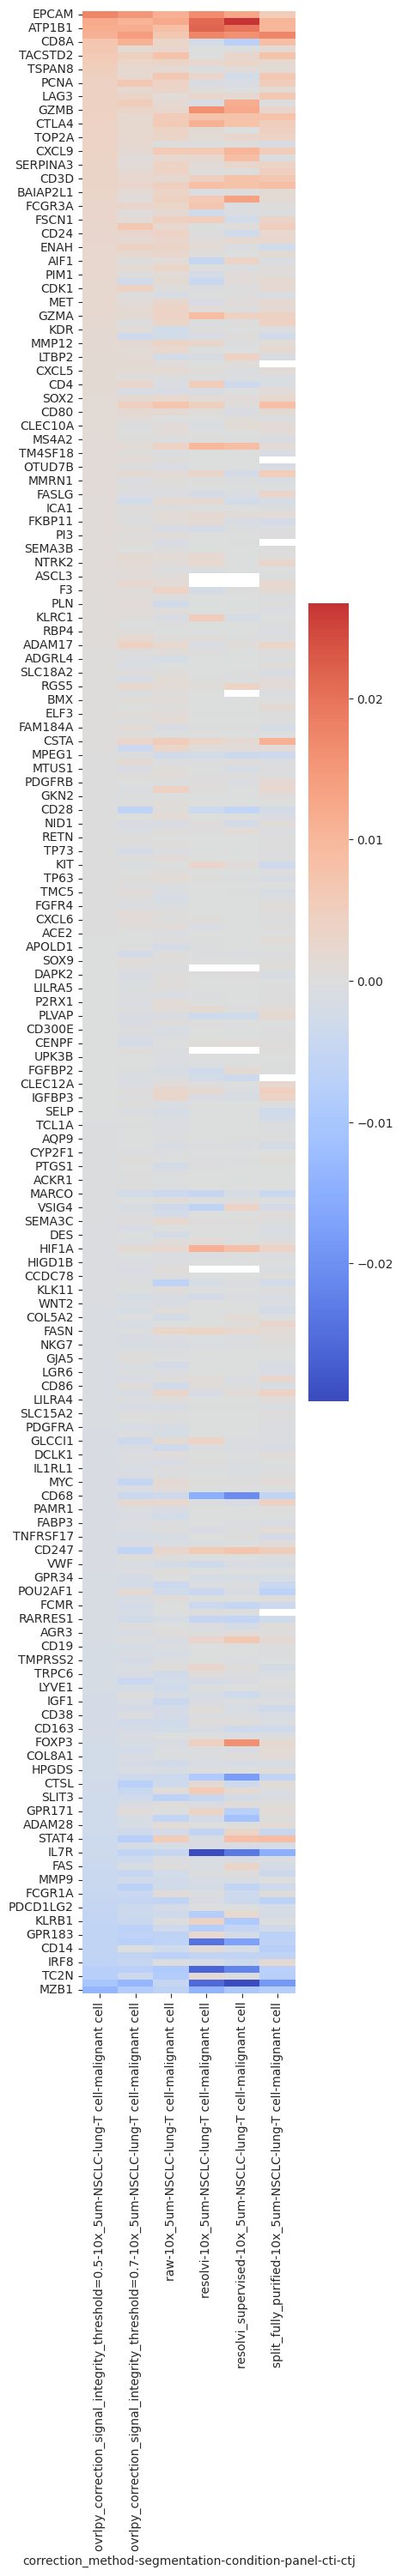

In [ ]:
df_mean = df_norm.groupby(['correction_method','segmentation','condition','panel','cti','ctj'])[df_norm.columns[8:]].mean()
sort_cols = df_mean.iloc[0].sort_values(ascending=False).index

plt.figure(figsize=(4,30))
ax = sns.heatmap(df_mean.loc[:,sort_cols].T,cmap='coolwarm',center=0.)
# ax.set_yticklabels(df['correction_method'])

In [ ]:
# top_importances = pd.DataFrame()
# for k,row in df_mean.iterrows():
#     top_importances[k] = row.sort_values(ascending=False).index[:20]
# top_importances.to_csv('../../scratch/top_importances.csv')

In [ ]:
# # Function to apply styling
# def highlight_markers(val):
#     if val in malignant_markers:
#         return "background-color: red; color: white"  # Red for malignant markers
#     elif val in tcell_markers:
#         return "background-color: green; color: white"  # Green for T cell markers
#     return ""  # Default styling

# # Apply styling to the DataFrame (excluding the index column)
# styled_df = top_importances.style.applymap(highlight_markers, subset=top_importances.columns)
# styled_df


/tmp/ipykernel_2852035/2675646905.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = top_importances.style.applymap(highlight_markers, subset=top_importances.columns)


In [ ]:
# # Define marker gene sets
# malignant_markers = {"EPCAM", "KRT7", "TACSTD2", "ATP1B1", "CSTA"}  # Common epithelial/malignant markers
# tcell_markers = {"CD8A", "CXCL13", "FOXP3", "GZMB", "RUNX3", "STAT4", "KLRD1"}  # Common T cell markers

# # Count occurrences of malignant and T cell markers in each method
# summary = {}
# for col in top_importances.columns:  # Skip index column
#     gene_list = set(top_importances[col])  # Unique genes in the method
#     malignant_count = len(gene_list & malignant_markers)
#     tcell_count = len(gene_list & tcell_markers)
#     summary[col] = {"Malignant Markers": malignant_count, "T Cell Markers": tcell_count}

# # Convert summary to DataFrame
# summary_df = pd.DataFrame(summary).T
# summary_df


Malignant Markers  \
ovrlpy_correction_signal_integrity_threshold=0.5 10x_5um NSCLC lung T cell malignant cell                  4   
ovrlpy_correction_signal_integrity_threshold=0.7 10x_5um NSCLC lung T cell malignant cell                  5   
raw                                              10x_5um NSCLC lung T cell malignant cell                  5   
resolvi                                          10x_5um NSCLC lung T cell malignant cell                  3   
resolvi_supervised                               10x_5um NSCLC lung T cell malignant cell                  3   
split_fully_purified                             10x_5um NSCLC lung T cell malignant cell                  5   

                                                                                           T Cell Markers  
ovrlpy_correction_signal_integrity_threshold=0.5 10x_5um NSCLC lung T cell malignant cell               3  
ovrlpy_correction_signal_integrity_threshold=0.7 10x_5um NSCLC lung T cell malignant cell               4  
raw                                              10x_5um NSCLC lung T cell malignant cell               4  
resolvi                                          10x_5um NSCLC lung T cell malignant cell               3  
resolvi_supervised                               10x_5um NSCLC lung T cell malignant cell               5  
split_fully_purified                             10x_5um NSCLC lung T cell malignant cell               4